<a href="https://colab.research.google.com/github/nnajeh/Calssification/blob/main/CIFAR_10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
cd /content/drive/MyDrive/All_CODE/Classification

/content/drive/MyDrive/All_CODE/Classification


In [2]:
#@title Import Libraries


In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import *
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD, Adam


In [4]:
#@title Load Image Dataset


In [5]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [6]:
#@title Visualize Image Dataset

In [7]:
'''
Function for visualizing images: Given a tensor of images, number of images, and
size per image, plots and prints the images in an uniform grid.
'''
def show_tensor_images(image_tensor, num_images=25, size=(3, 32, 32)):
    image_tensor = (image_tensor + 1) / 2
    image_unflat = image_tensor
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

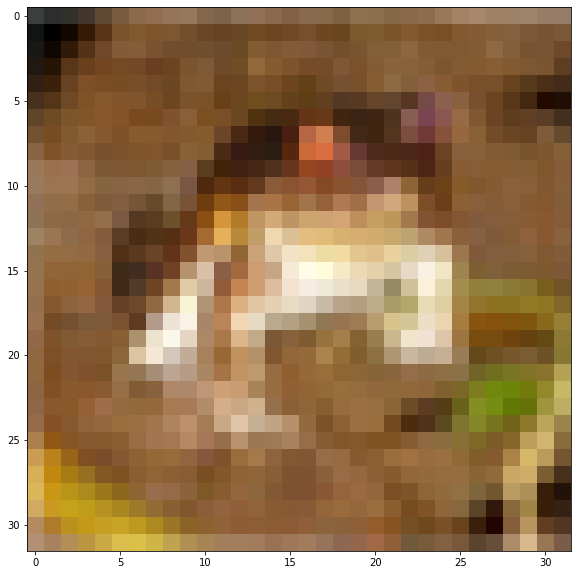

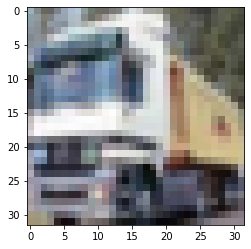

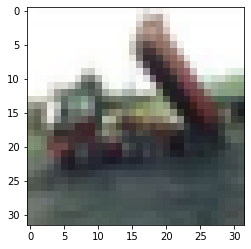

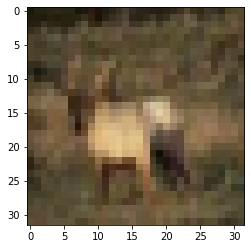

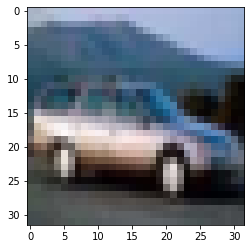

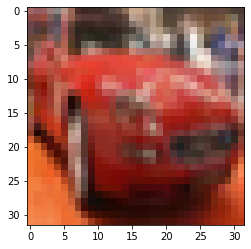

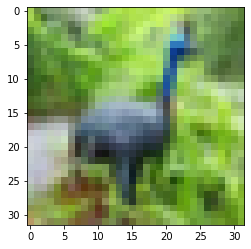

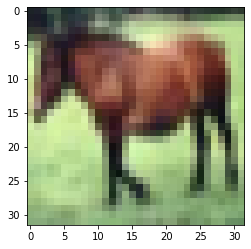

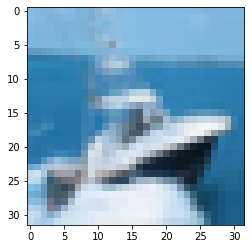

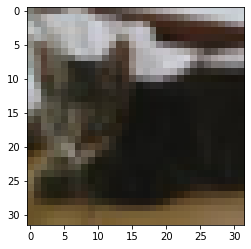

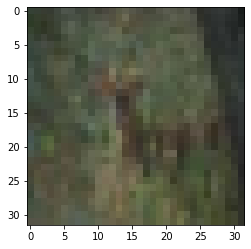

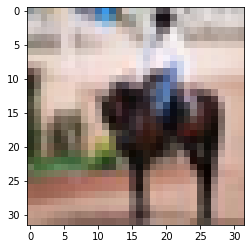

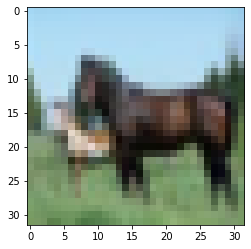

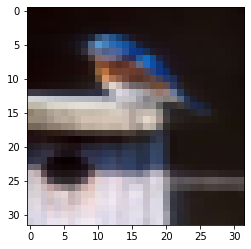

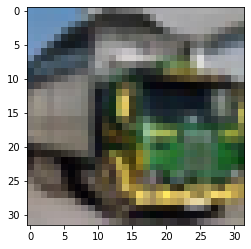

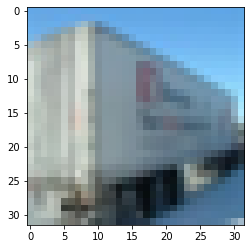

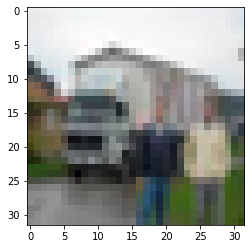

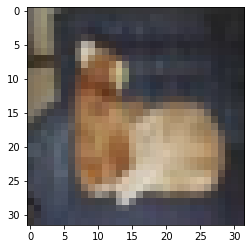

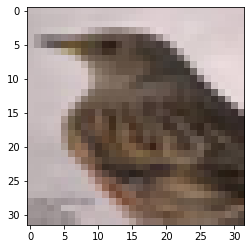

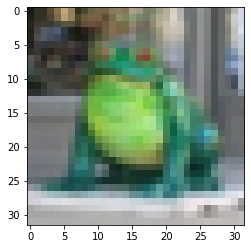

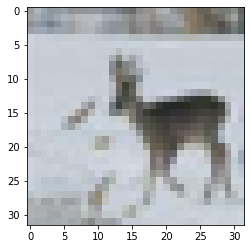

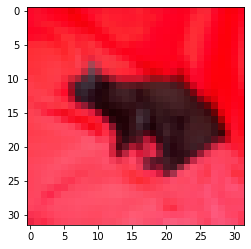

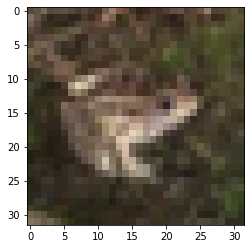

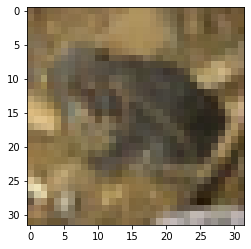

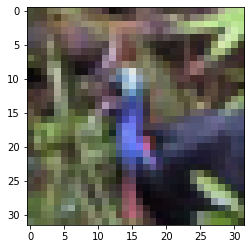

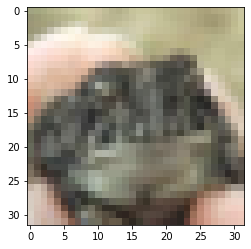

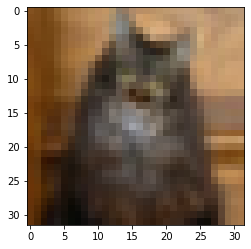

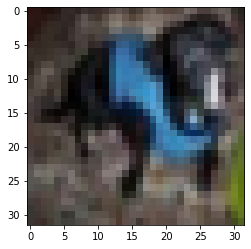

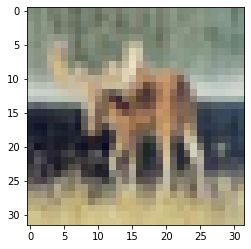

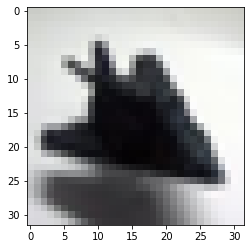

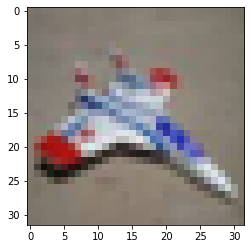

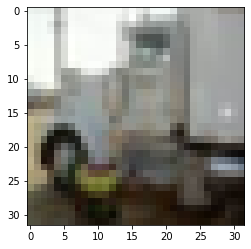

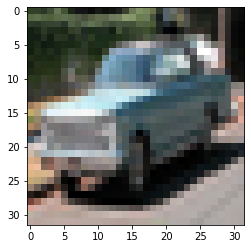

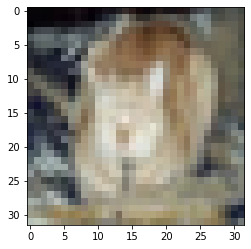

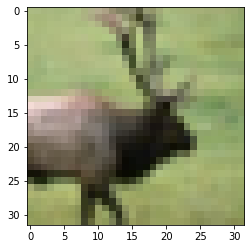

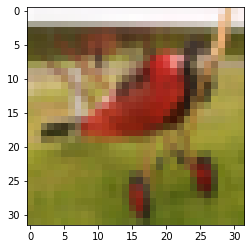

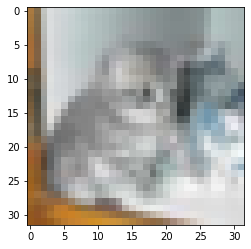

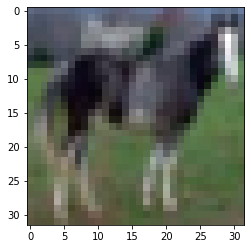

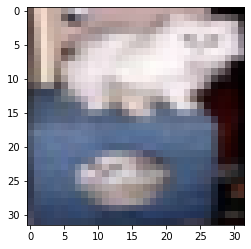

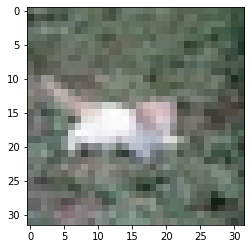

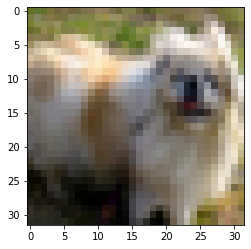

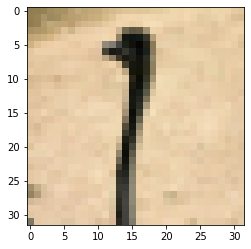

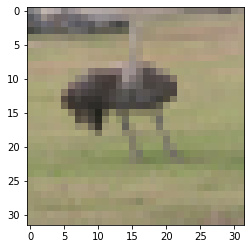

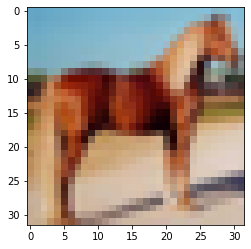

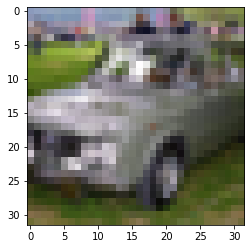

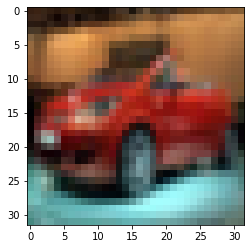

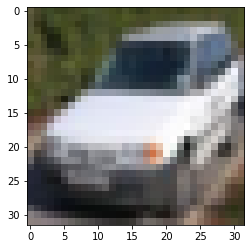

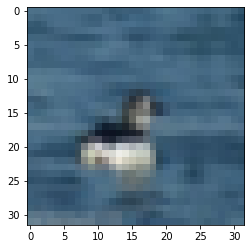

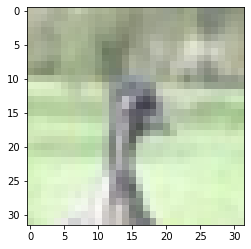

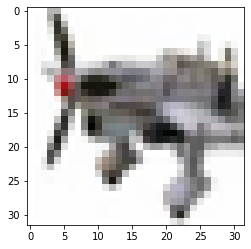

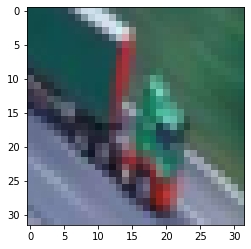

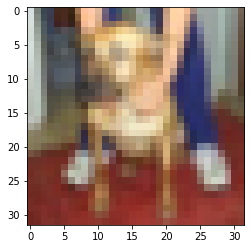

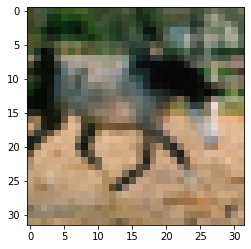

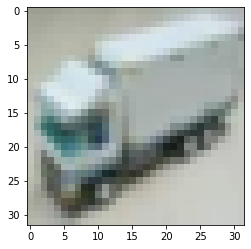

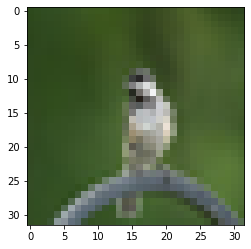

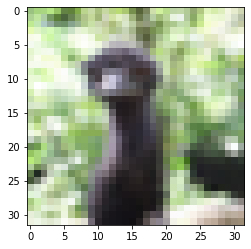

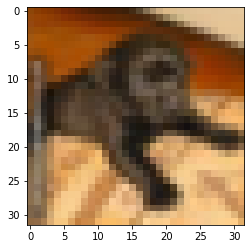

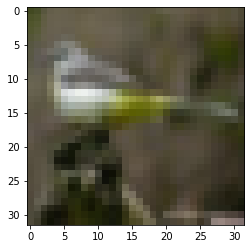

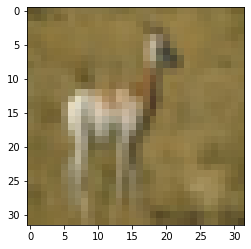

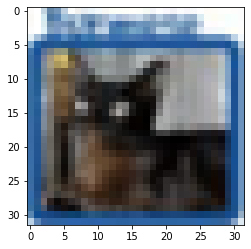

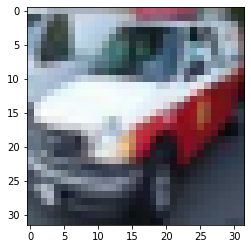

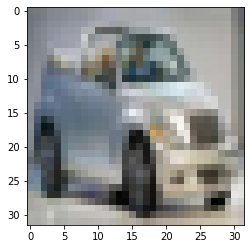

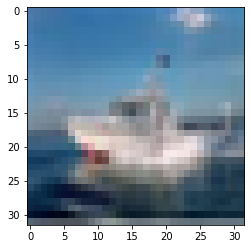

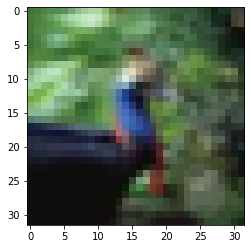

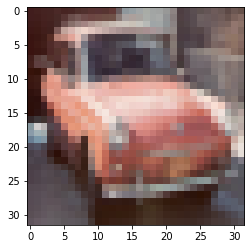

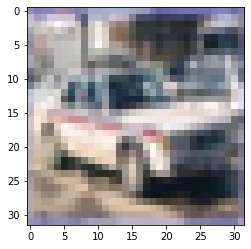

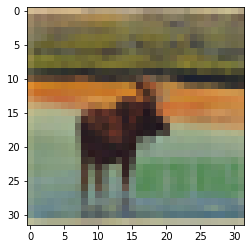

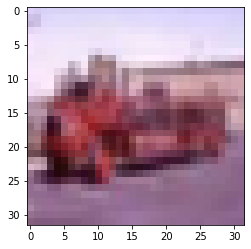

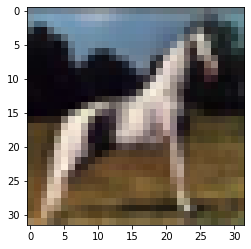

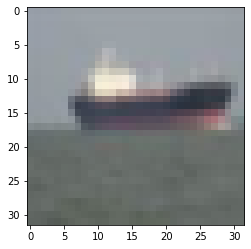

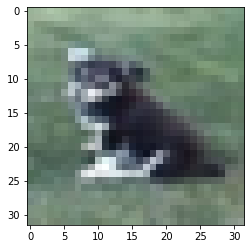

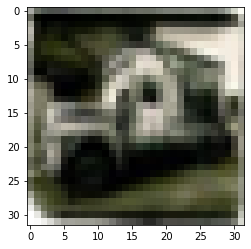

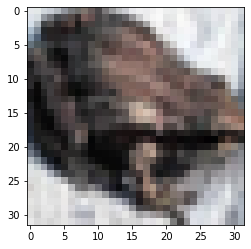

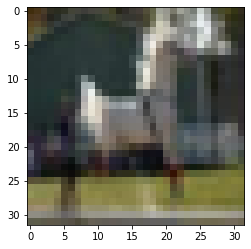

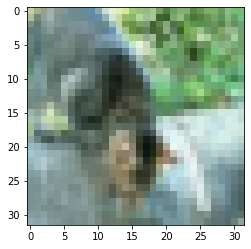

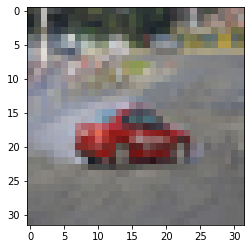

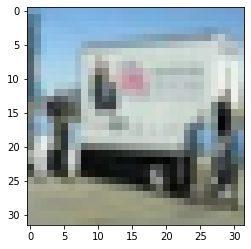

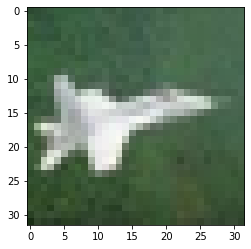

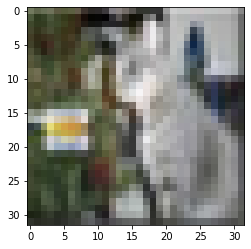

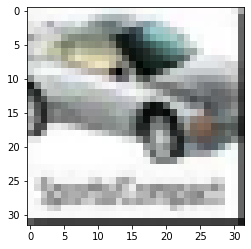

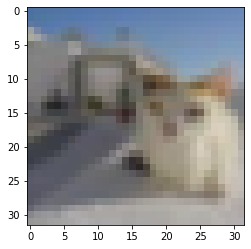

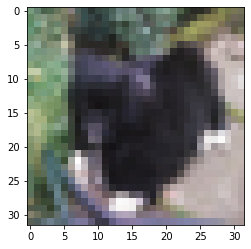

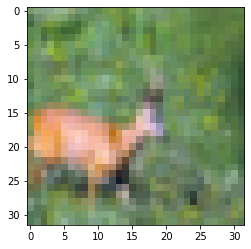

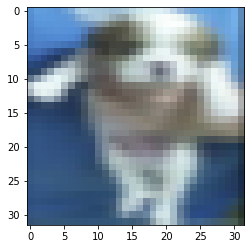

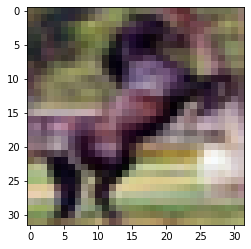

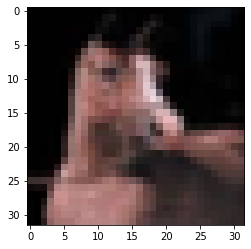

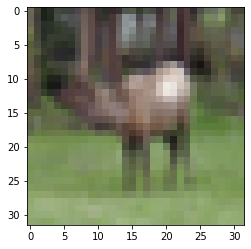

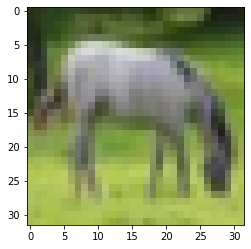

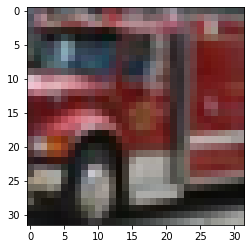

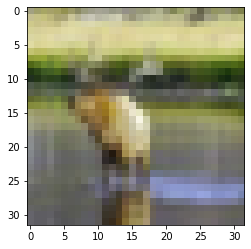

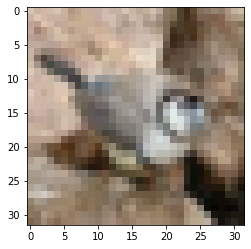

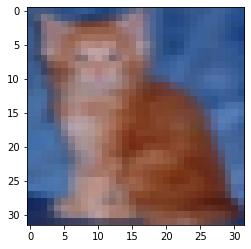

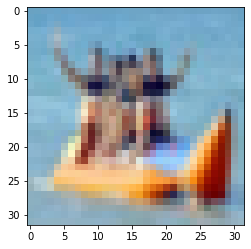

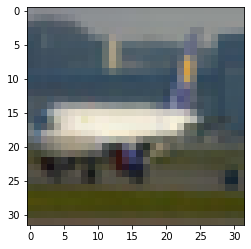

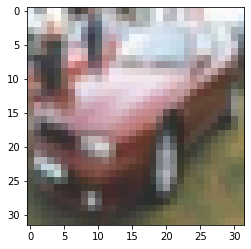

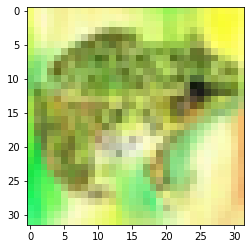

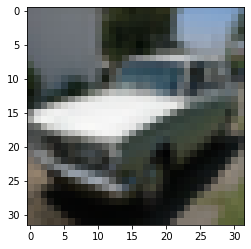

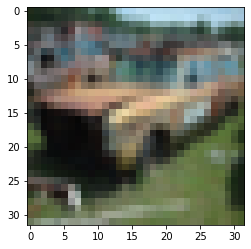

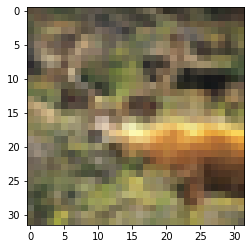

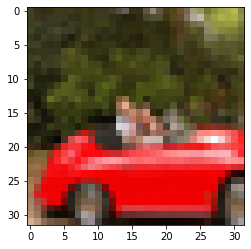

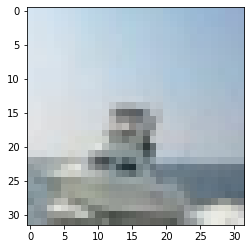

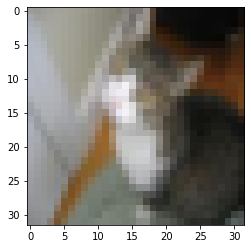

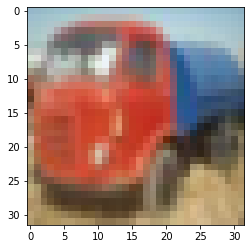

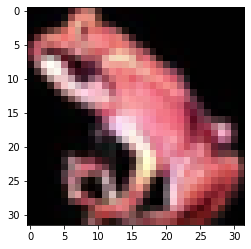

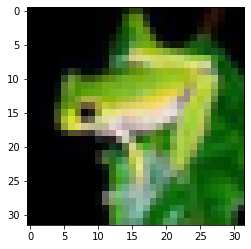

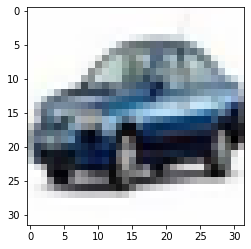

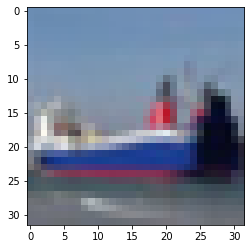

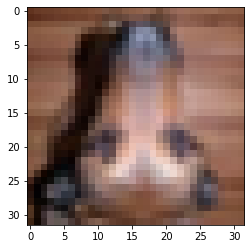

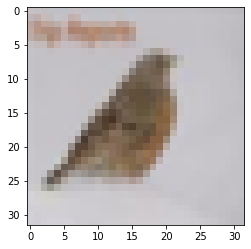

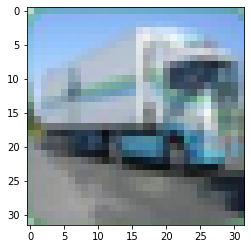

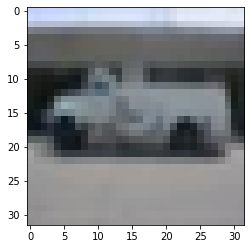

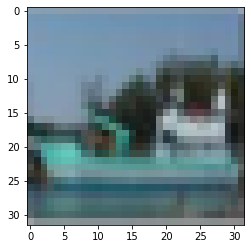

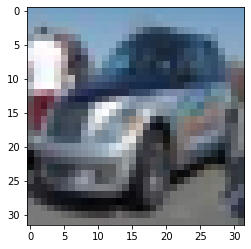

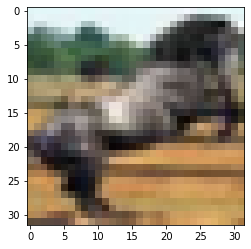

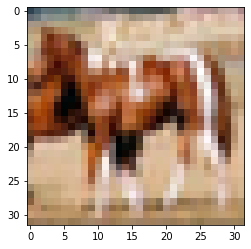

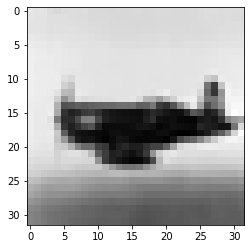

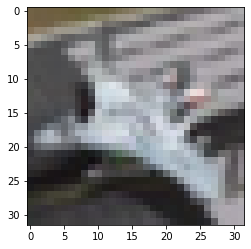

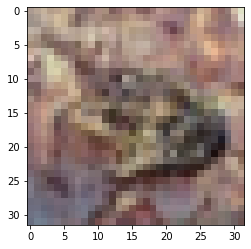

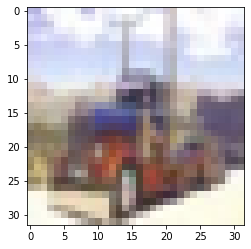

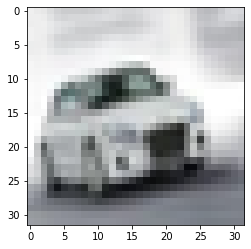

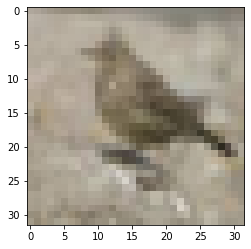

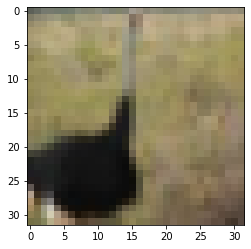

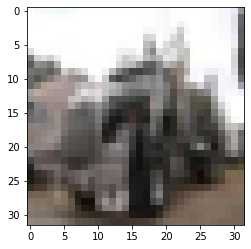

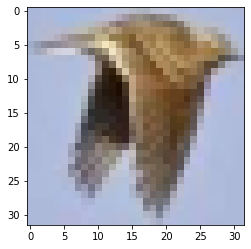

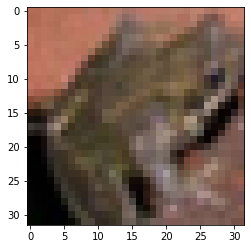

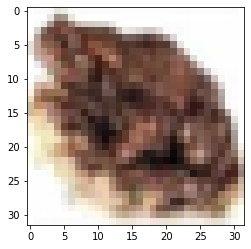

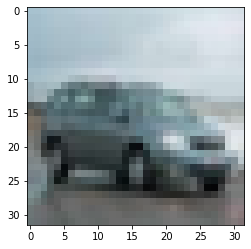

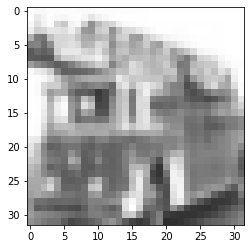

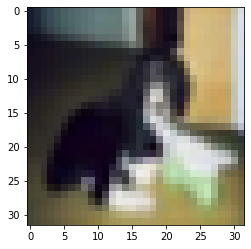

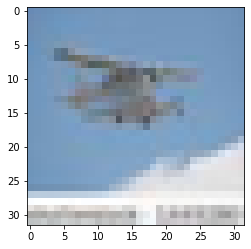

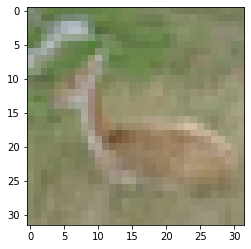

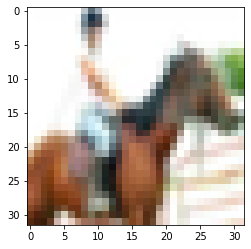

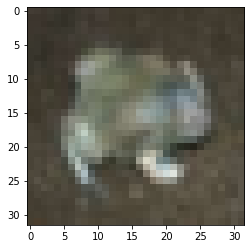

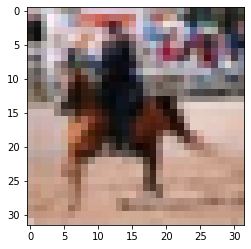

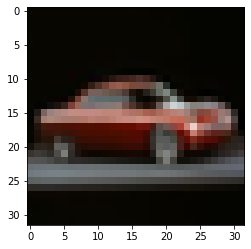

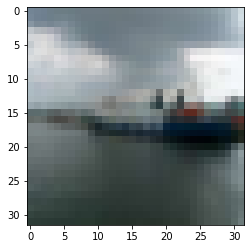

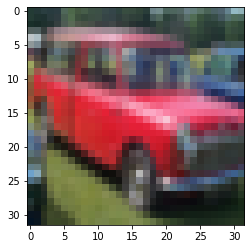

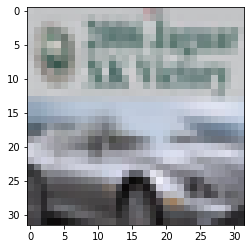

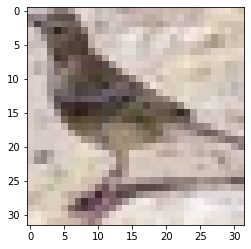

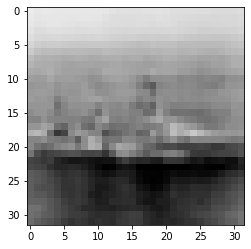

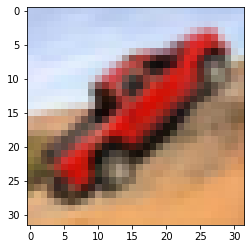

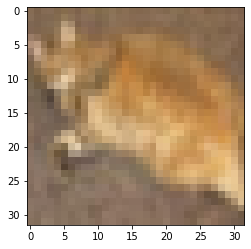

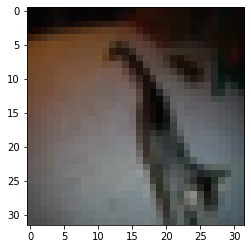

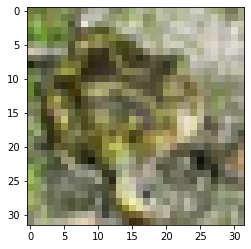

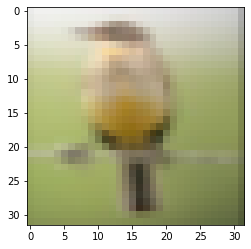

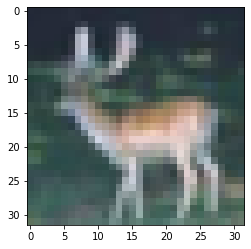

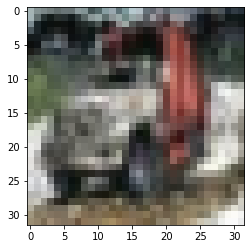

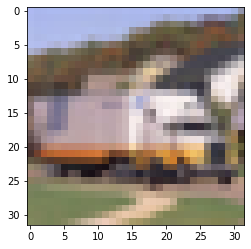

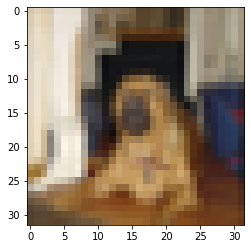

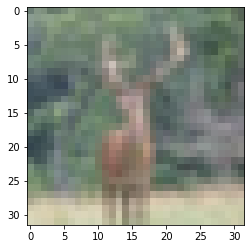

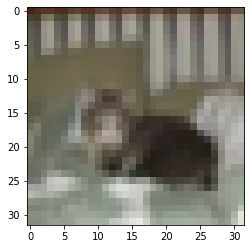

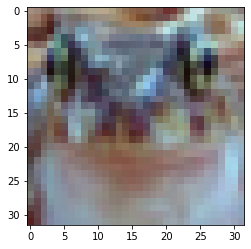

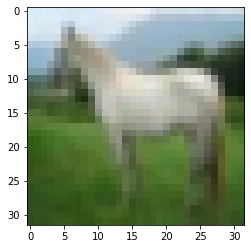

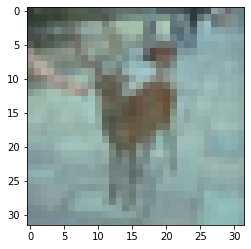

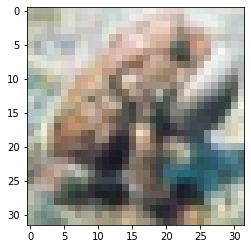

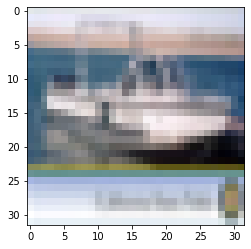

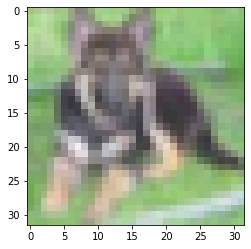

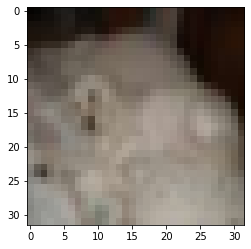

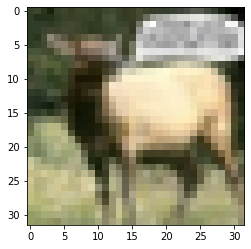

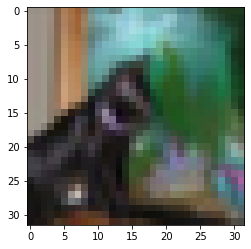

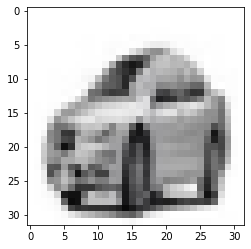

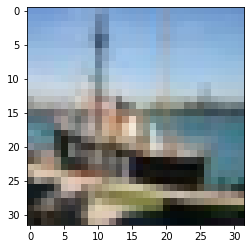

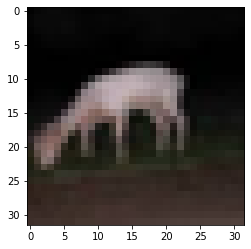

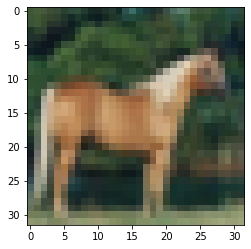

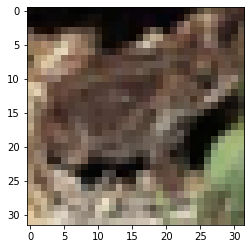

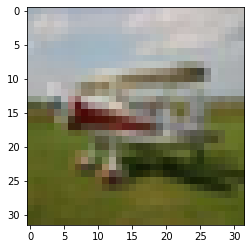

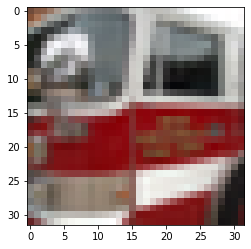

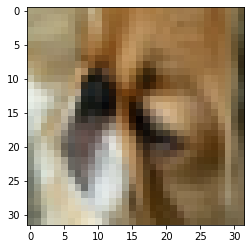

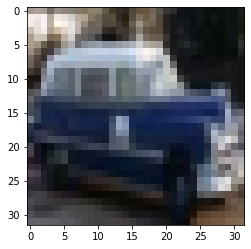

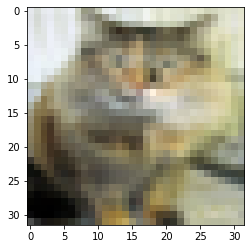

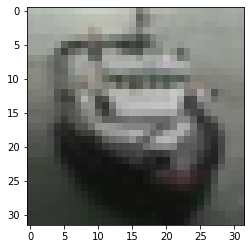

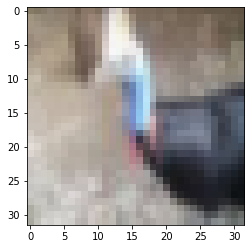

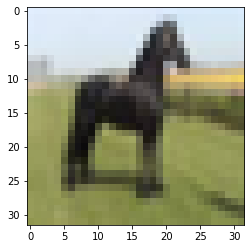

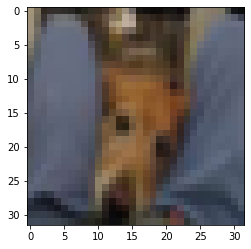

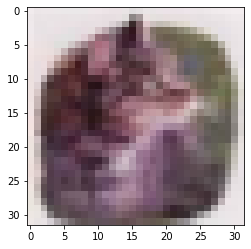

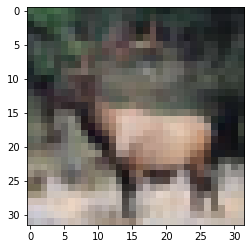

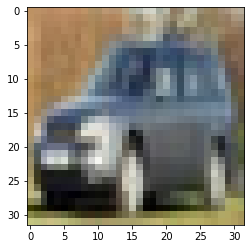

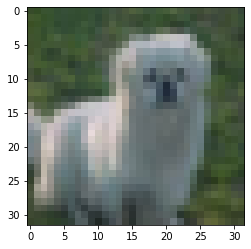

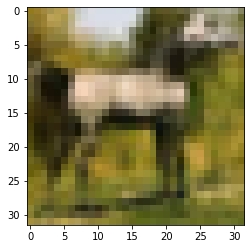

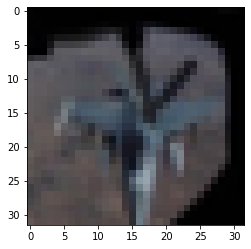

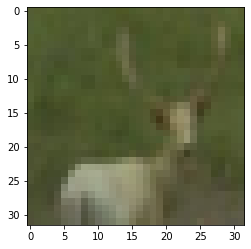

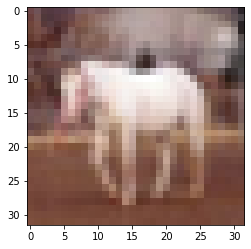

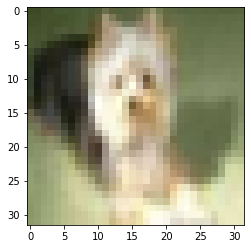

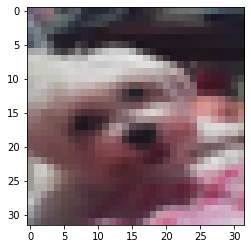

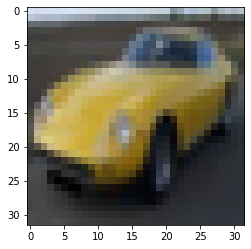

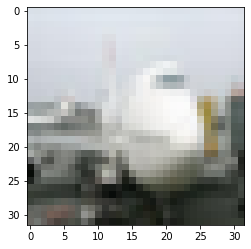

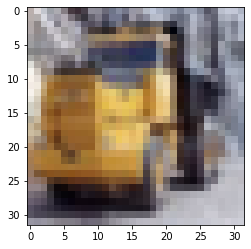

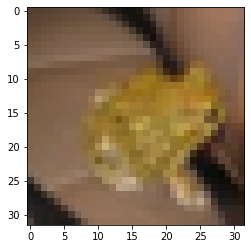

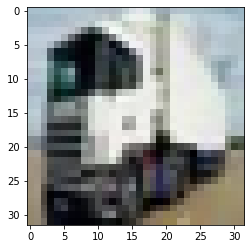

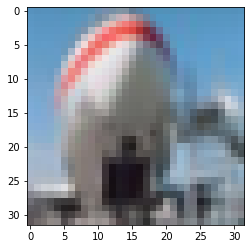

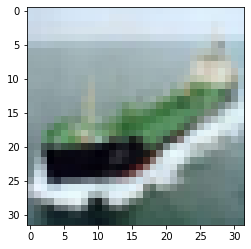

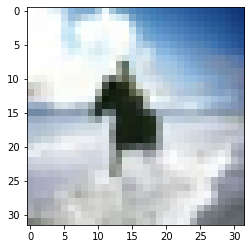

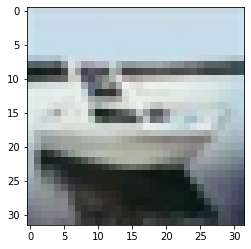

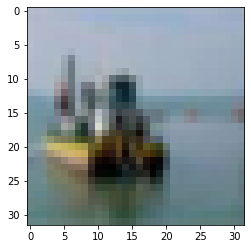

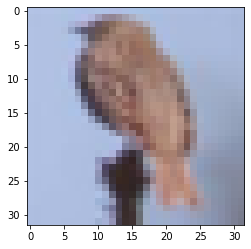

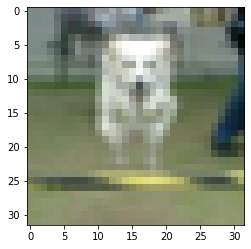

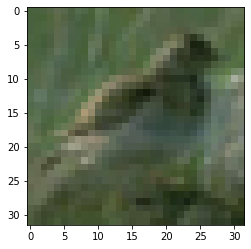

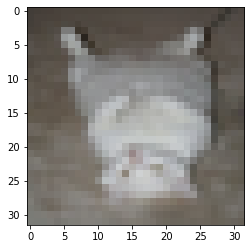

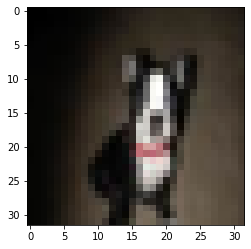

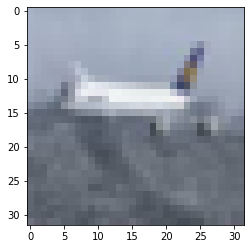

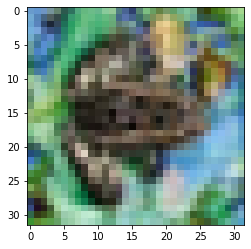

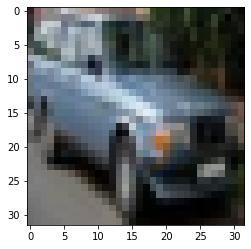

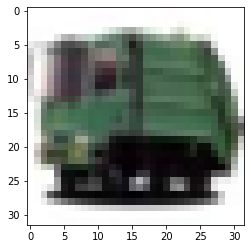

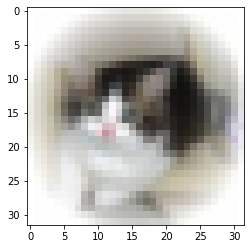

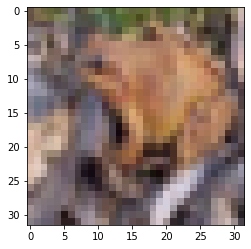

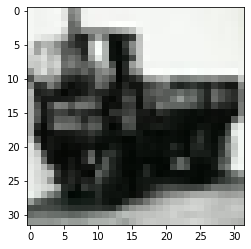

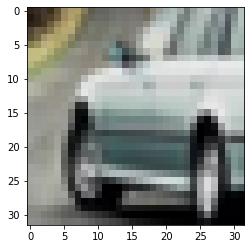

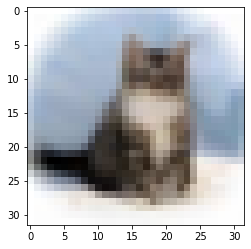

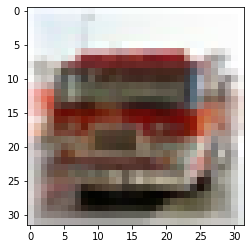

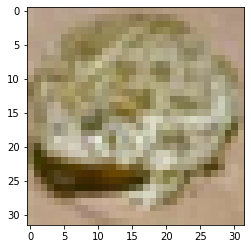

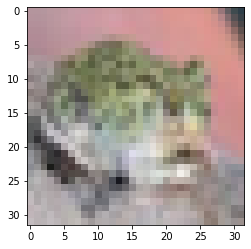

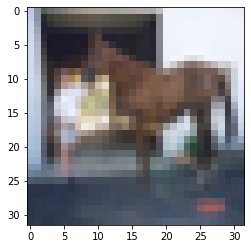

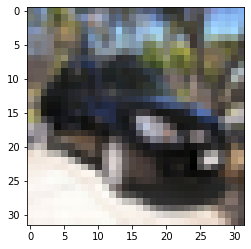

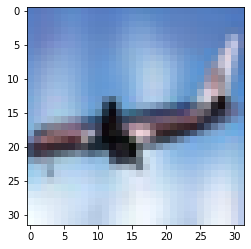

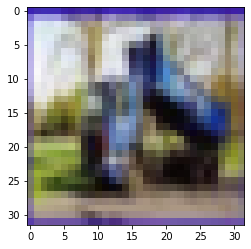

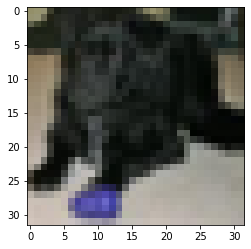

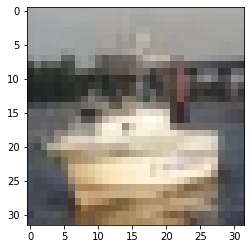

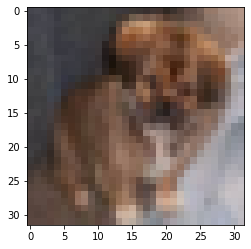

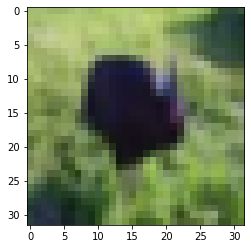

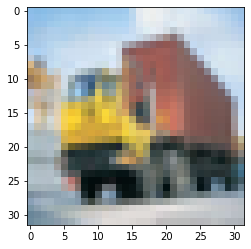

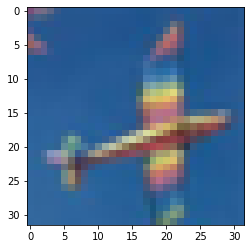

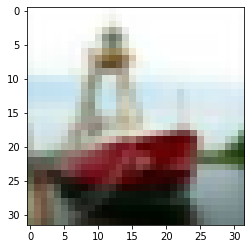

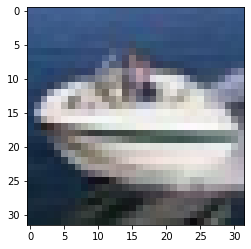

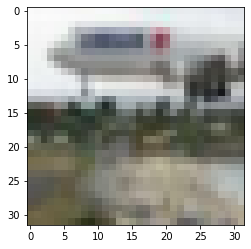

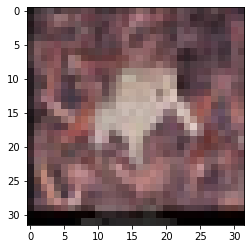

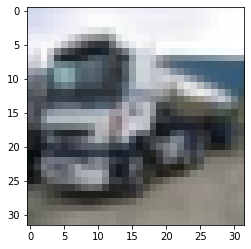

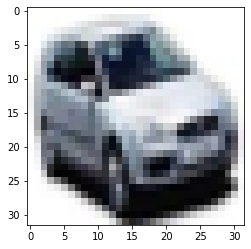

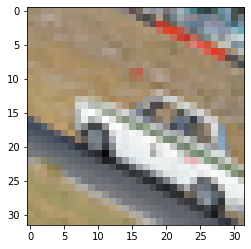

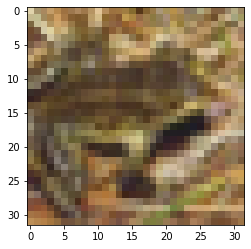

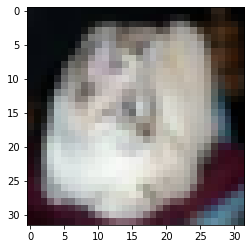

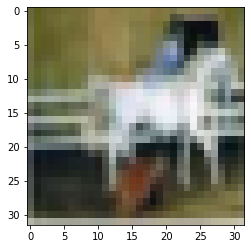

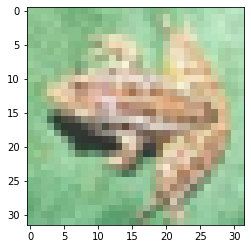

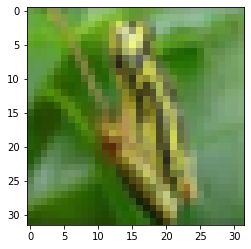

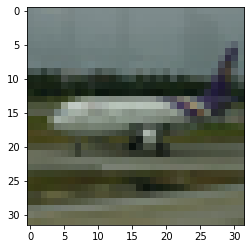

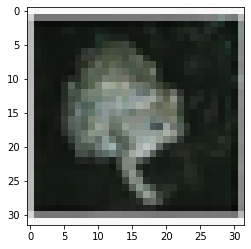

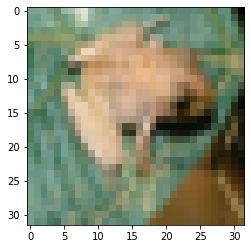

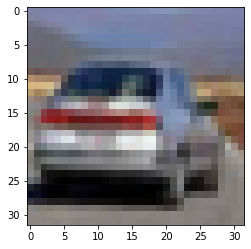

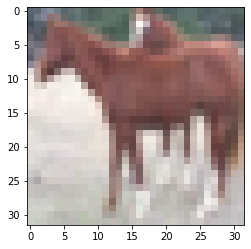

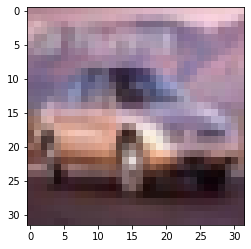

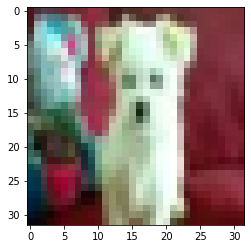

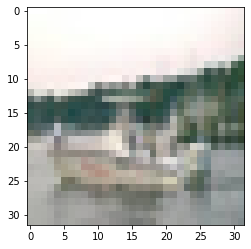

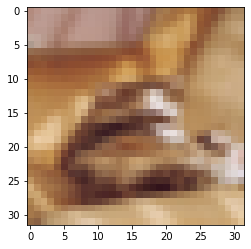

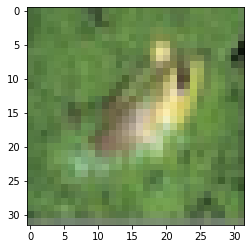

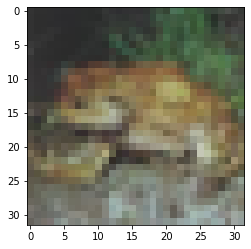

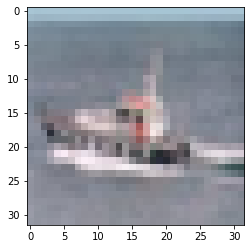

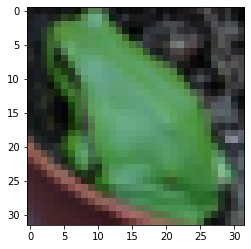

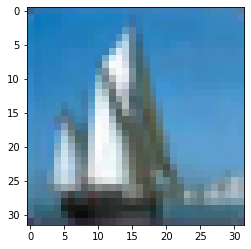

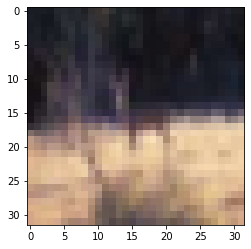

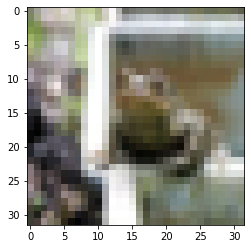

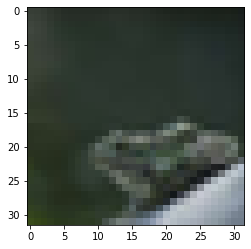

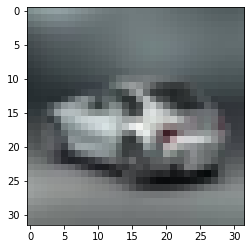

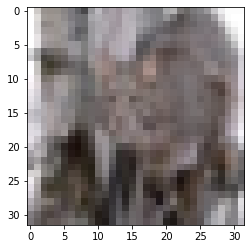

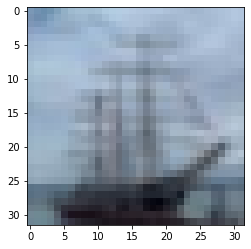

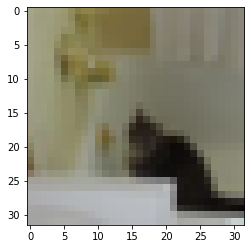

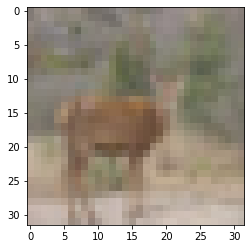

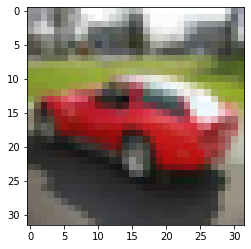

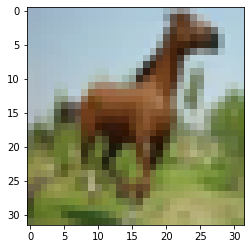

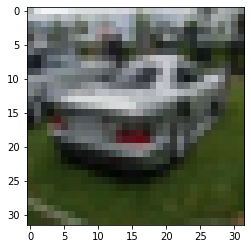

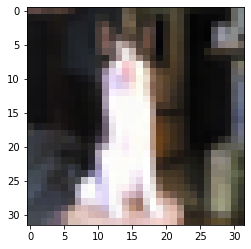

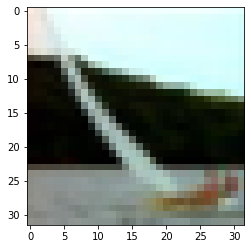

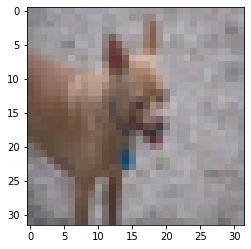

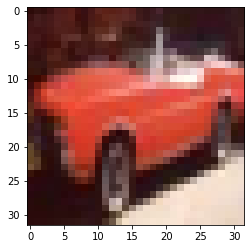

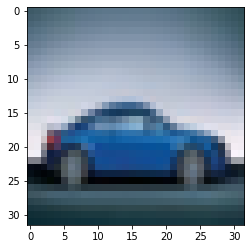

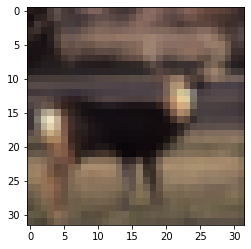

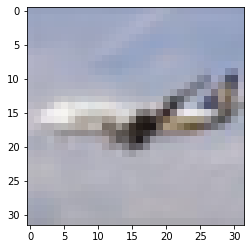

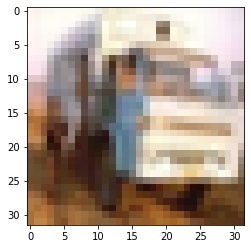

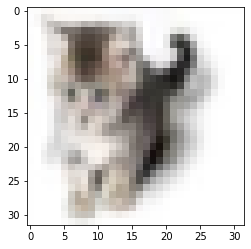

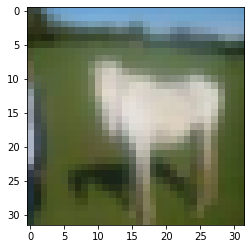

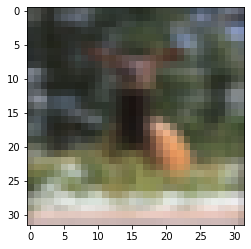

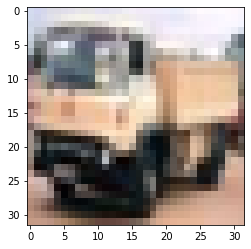

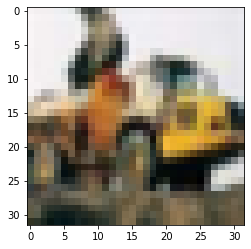

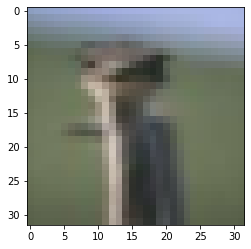

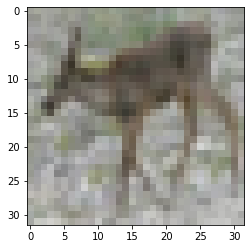

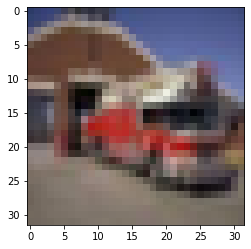

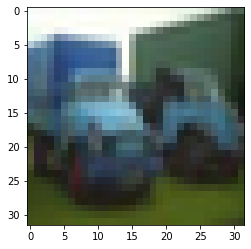

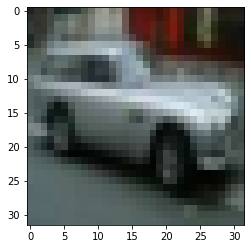

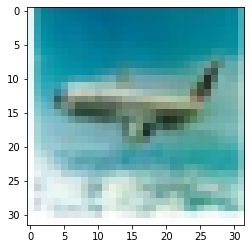

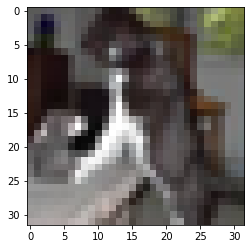

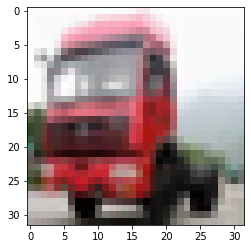

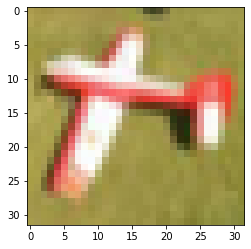

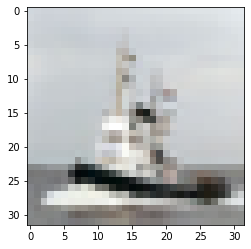

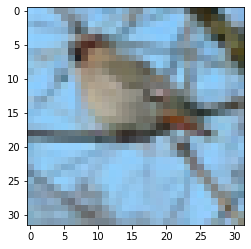

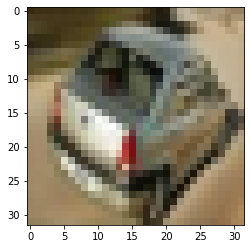

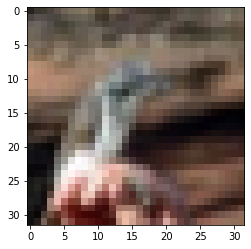

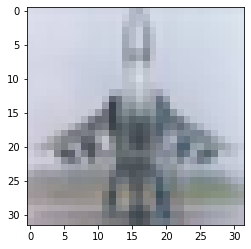

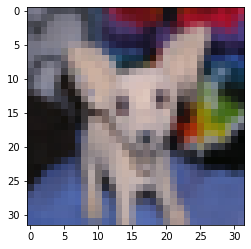

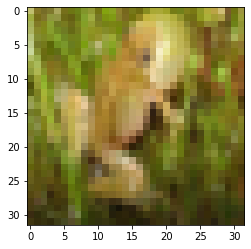

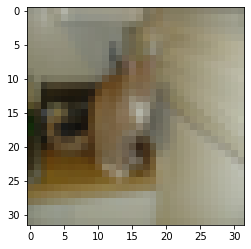

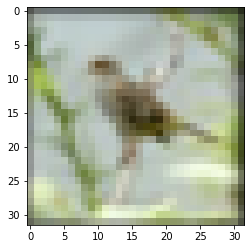

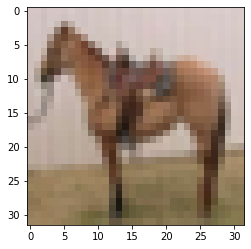

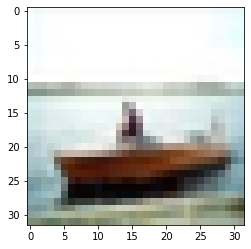

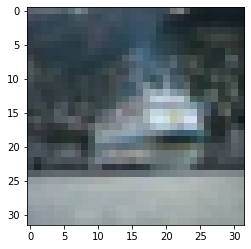

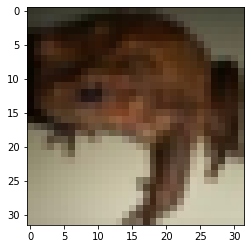

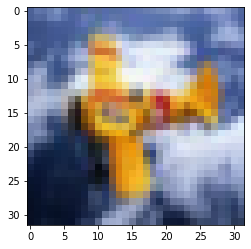

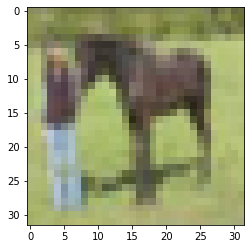

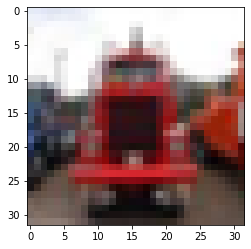

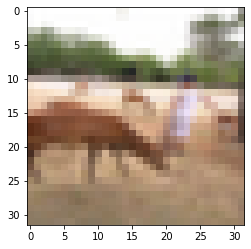

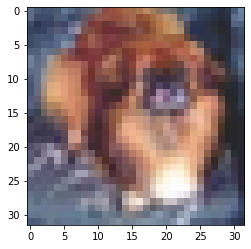

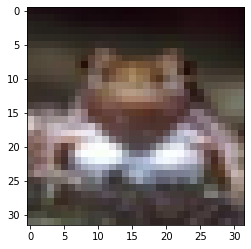

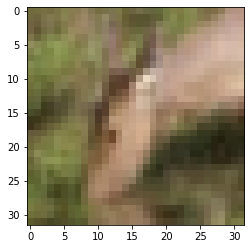

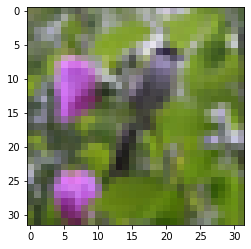

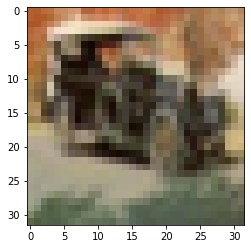

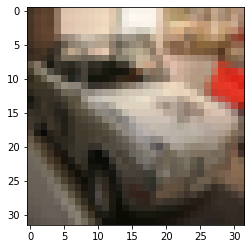

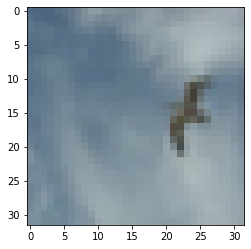

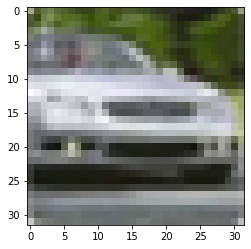

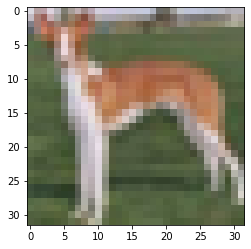

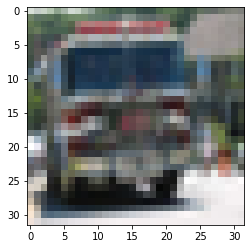

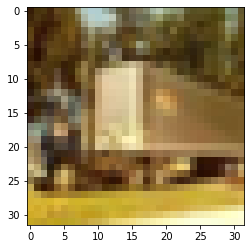

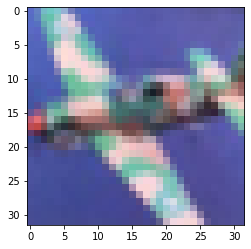

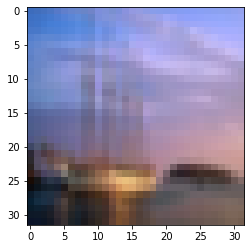

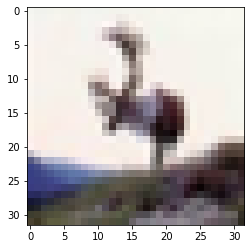

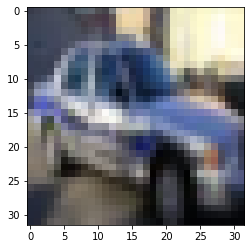

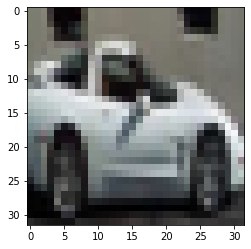

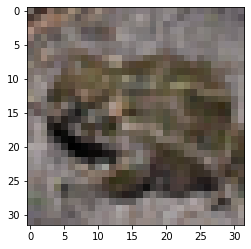

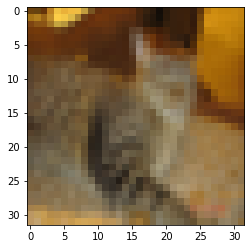

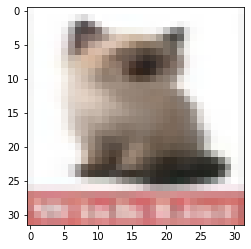

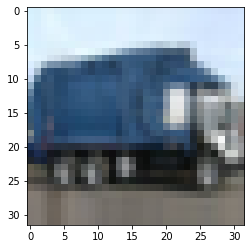

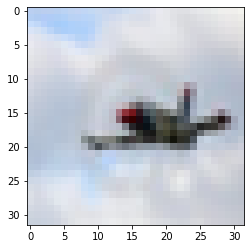

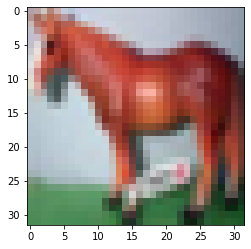

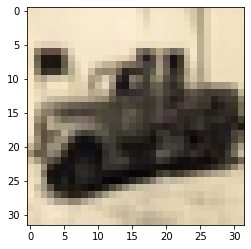

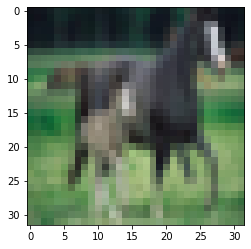

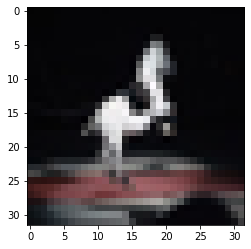

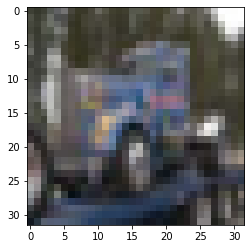

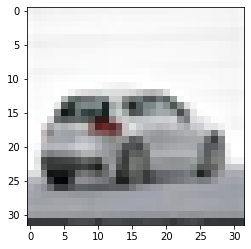

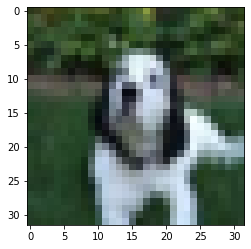

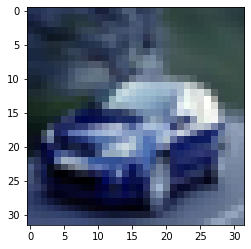

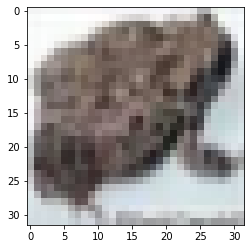

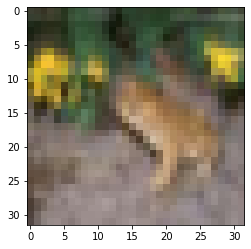

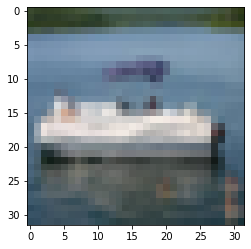

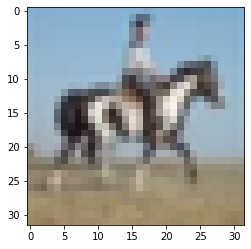

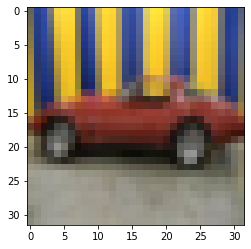

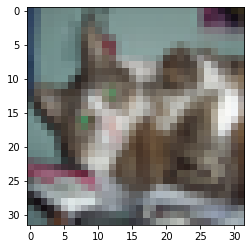

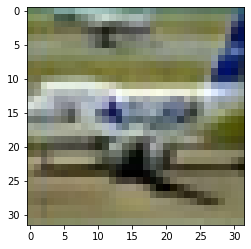

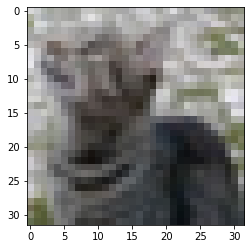

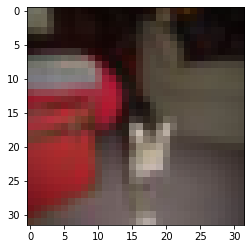

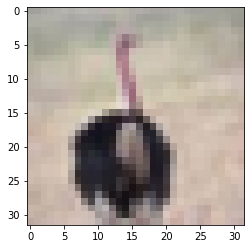

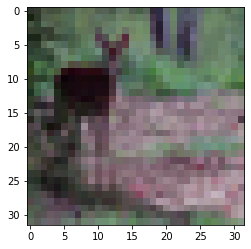

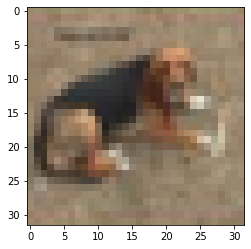

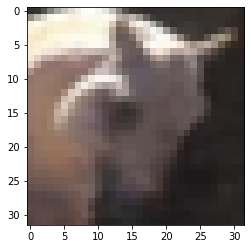

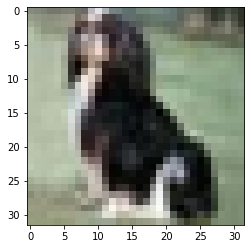

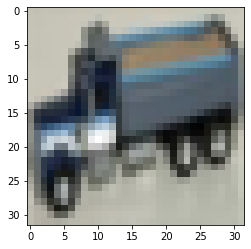

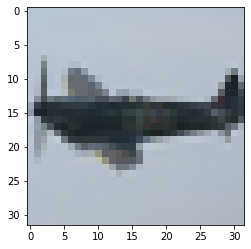

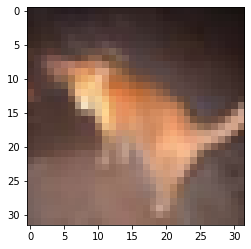

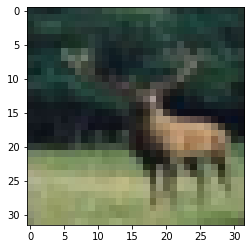

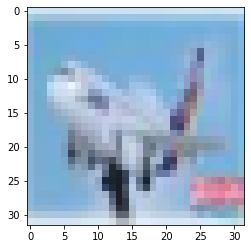

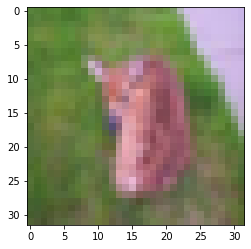

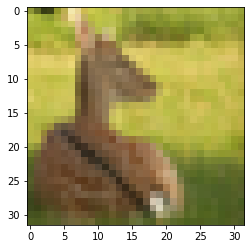

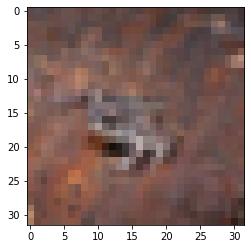

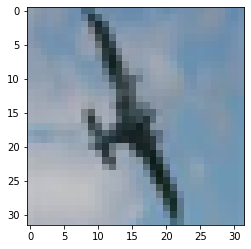

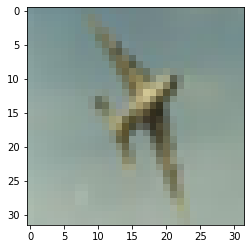

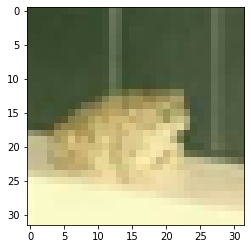

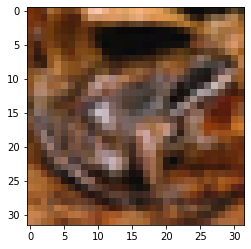

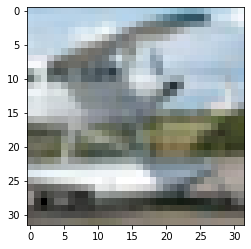

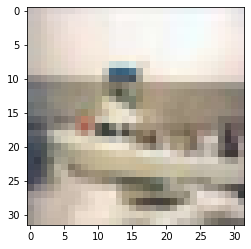

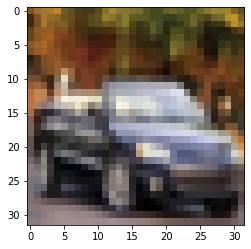

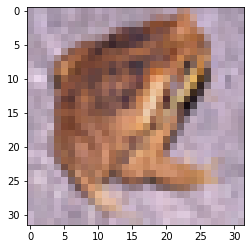

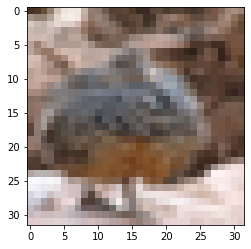

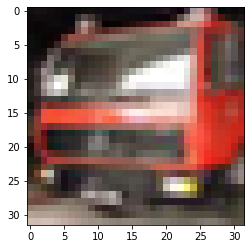

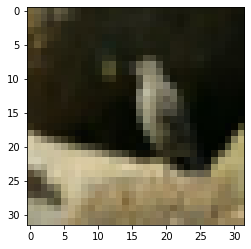

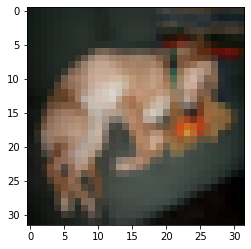

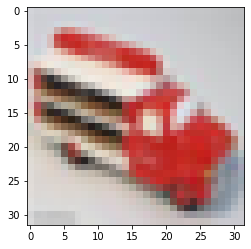

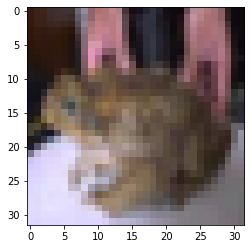

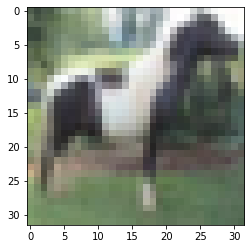

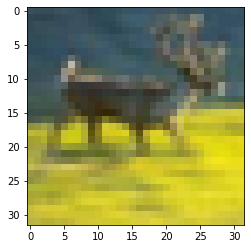

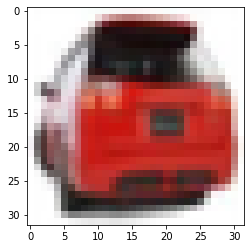

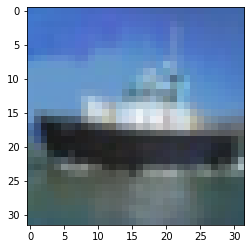

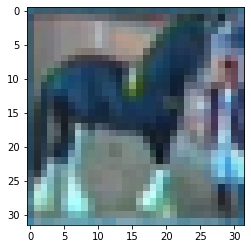

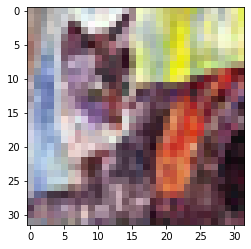

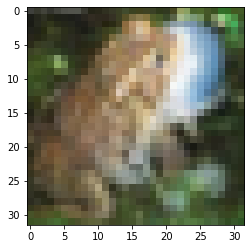

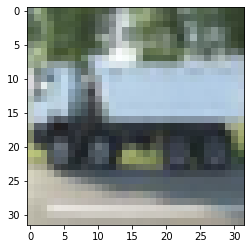

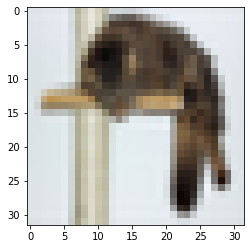

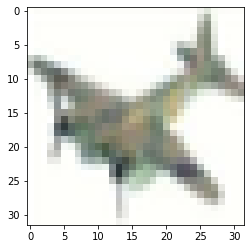

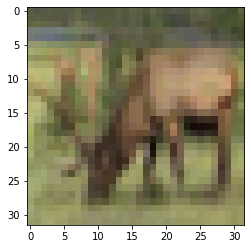

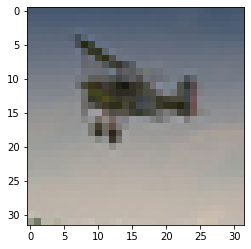

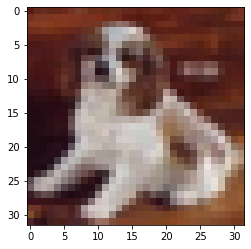

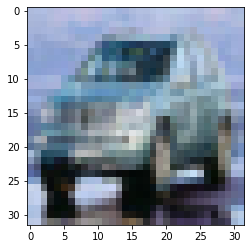

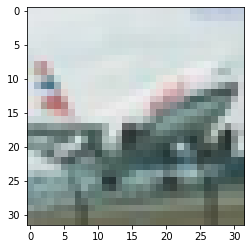

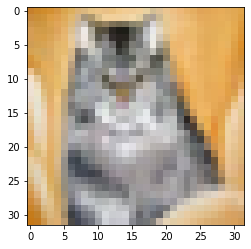

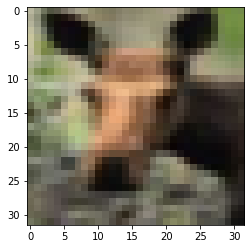

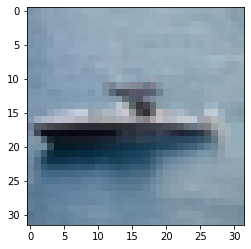

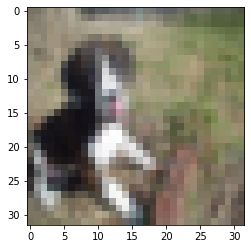

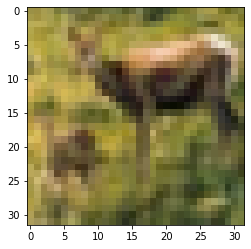

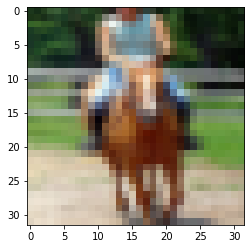

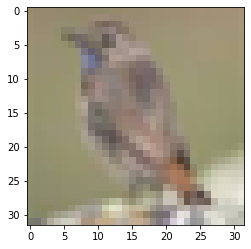

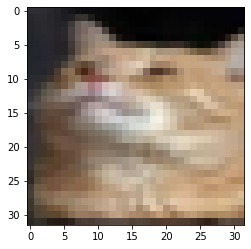

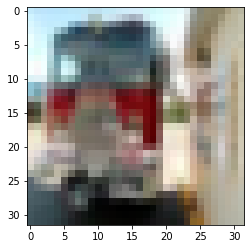

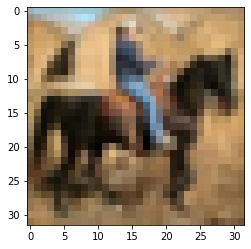

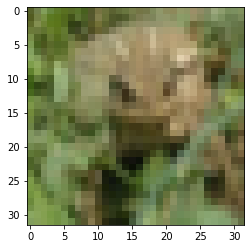

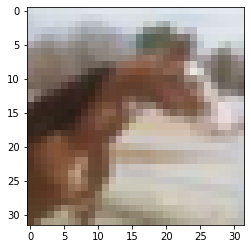

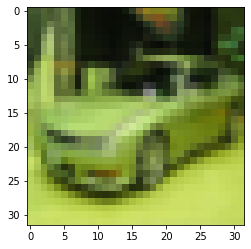

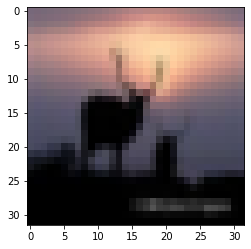

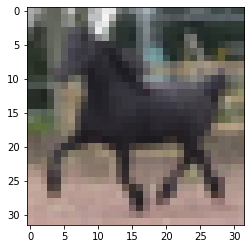

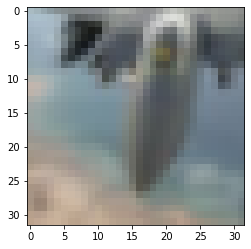

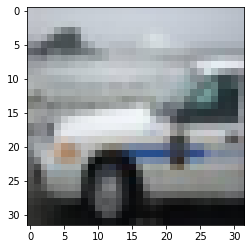

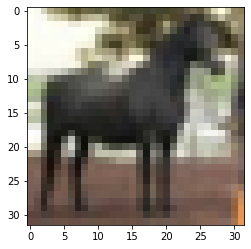

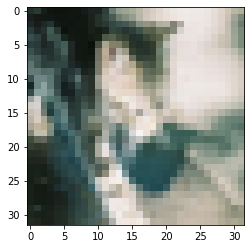

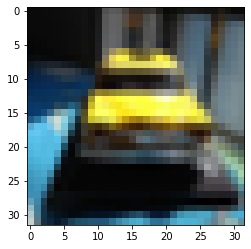

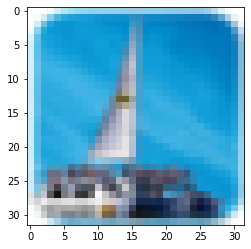

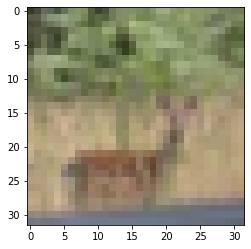

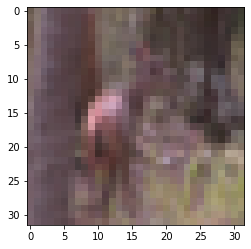

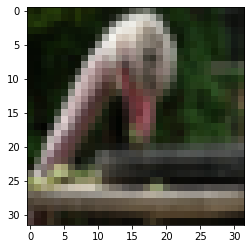

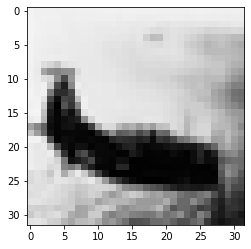

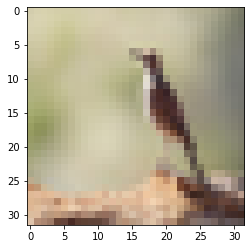

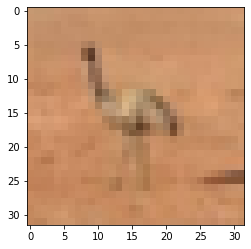

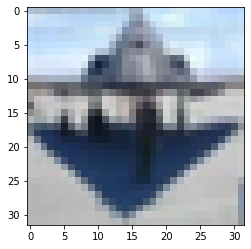

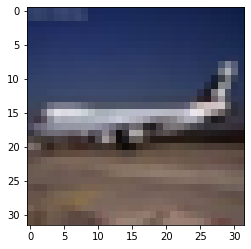

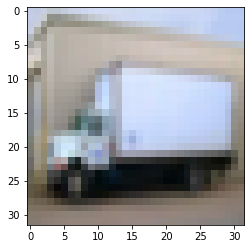

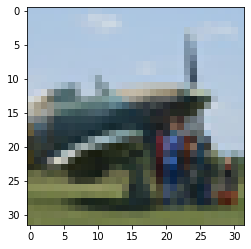

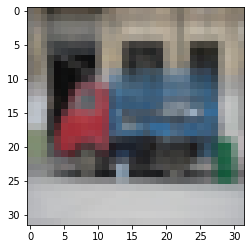

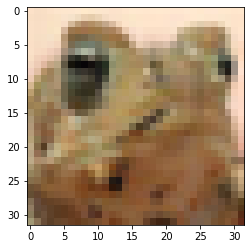

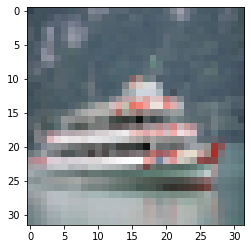

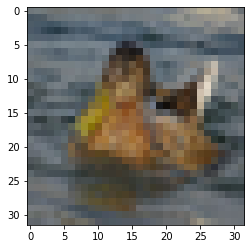

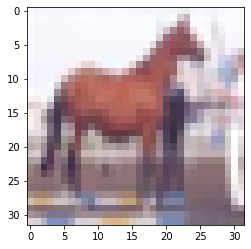

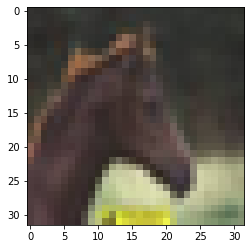

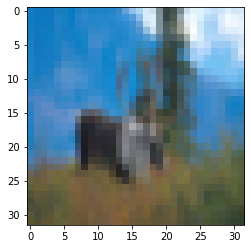

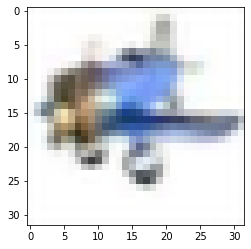

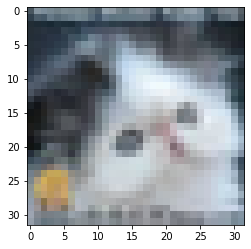

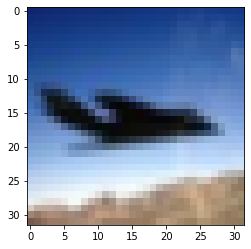

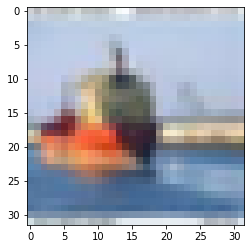

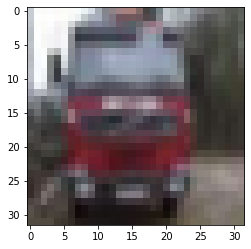

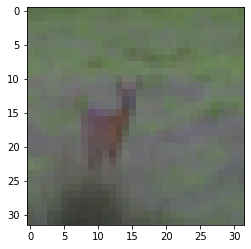

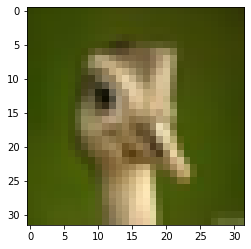

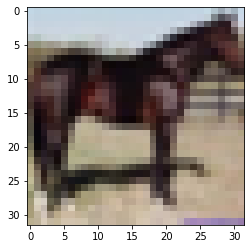

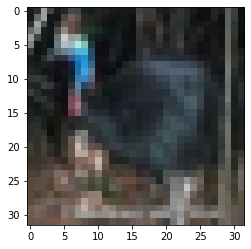

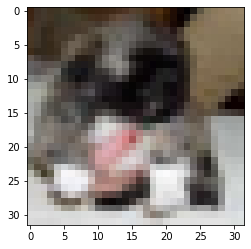

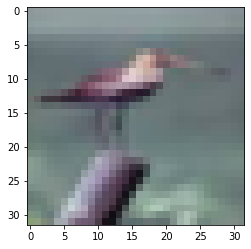

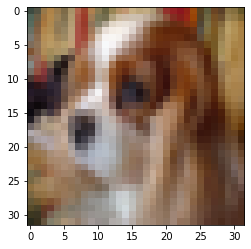

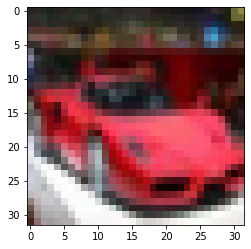

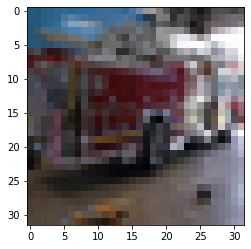

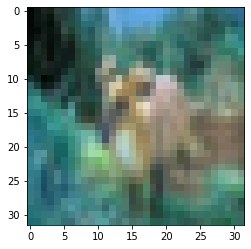

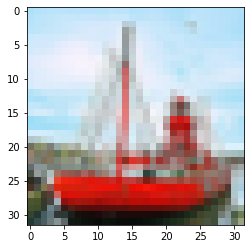

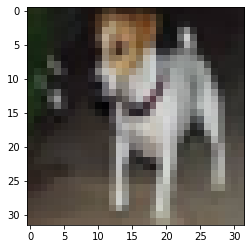

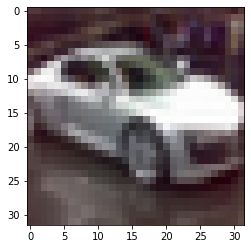

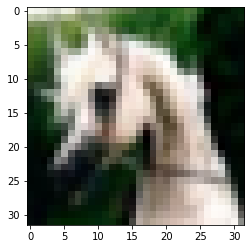

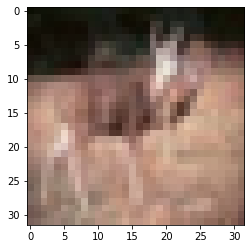

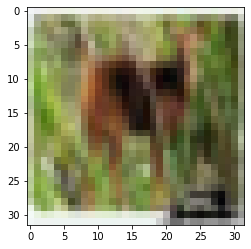

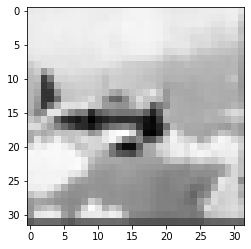

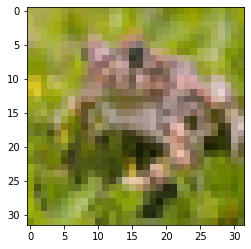

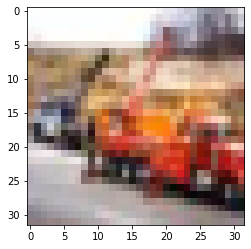

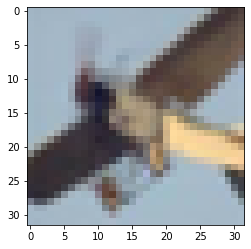

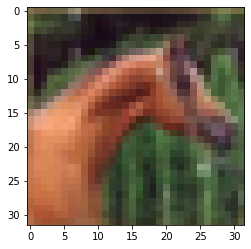

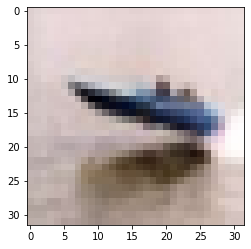

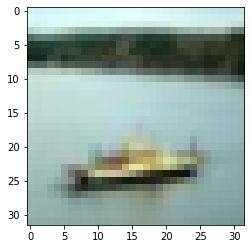

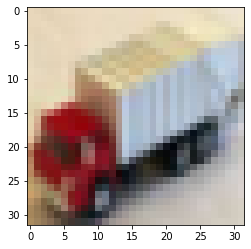

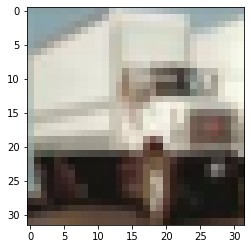

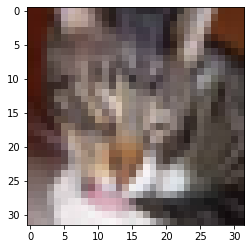

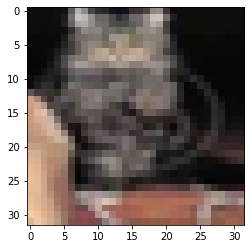

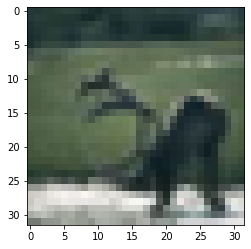

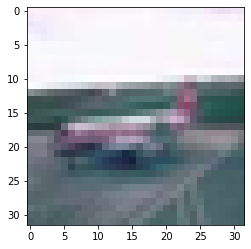

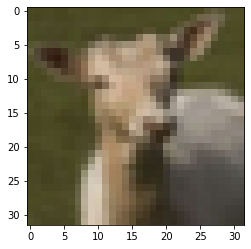

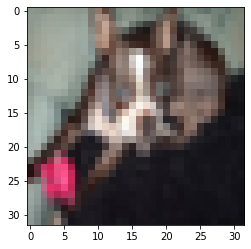

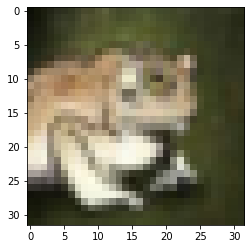

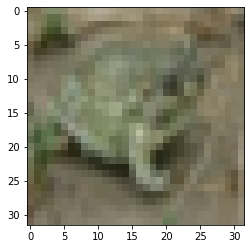

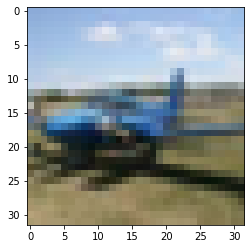

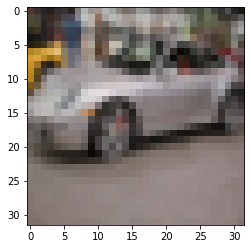

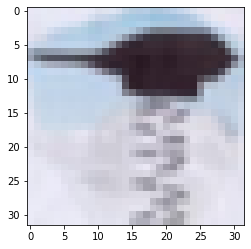

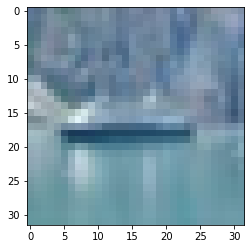

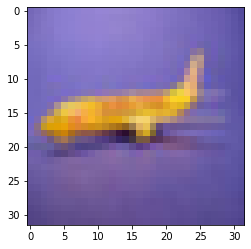

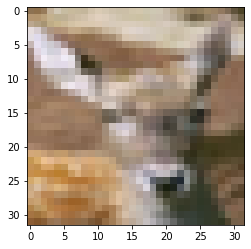

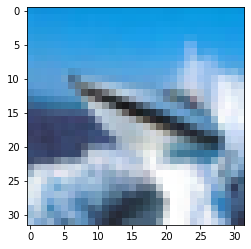

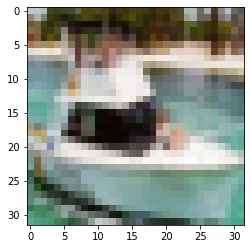

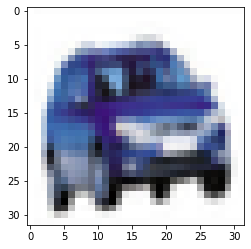

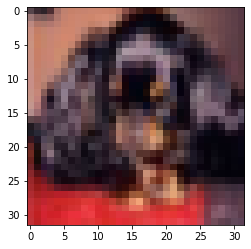

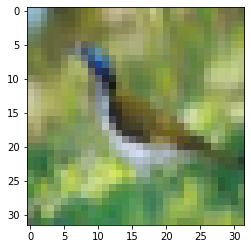

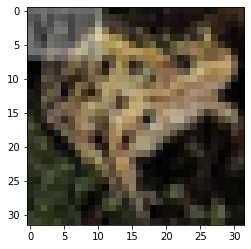

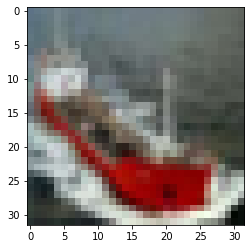

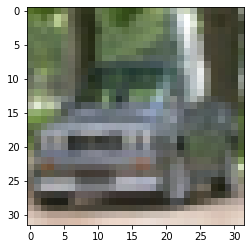

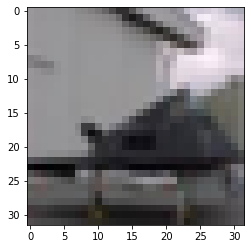

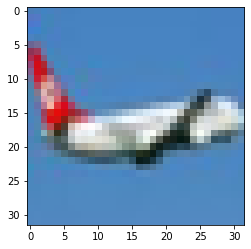

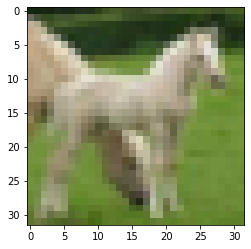

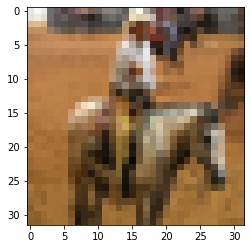

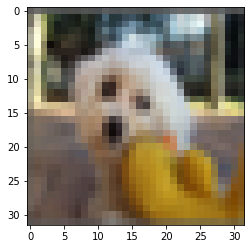

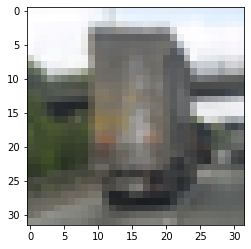

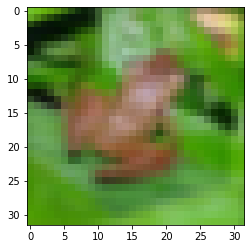

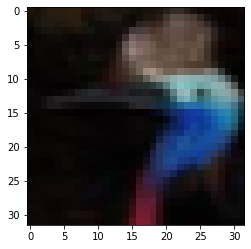

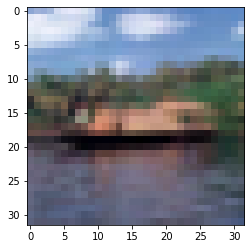

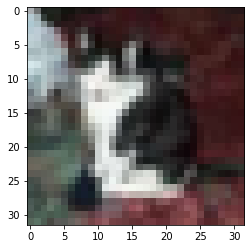

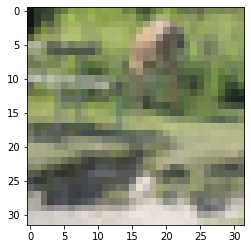

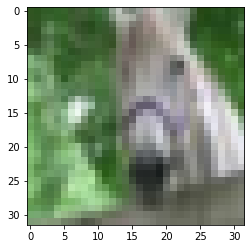

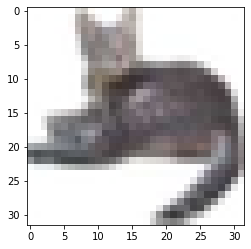

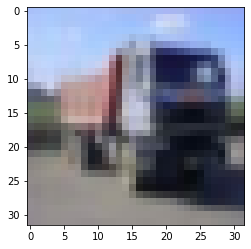

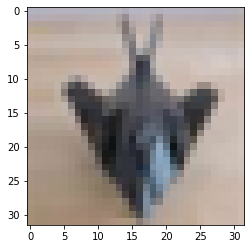

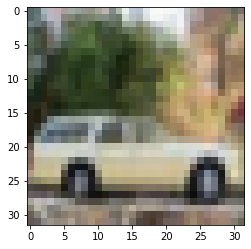

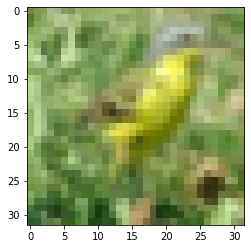

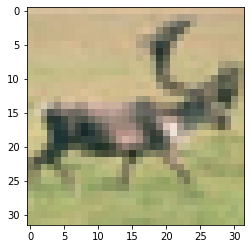

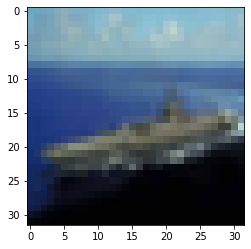

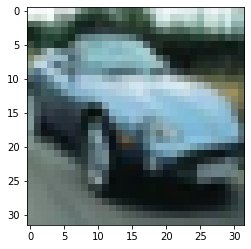

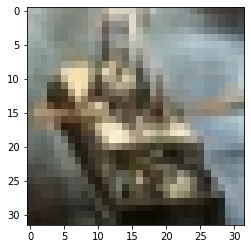

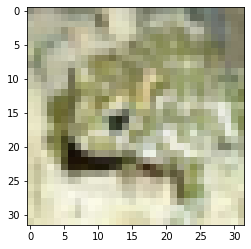

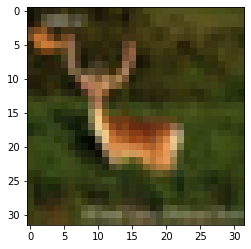

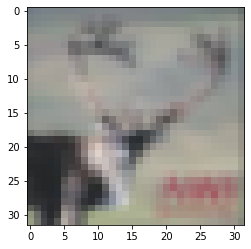

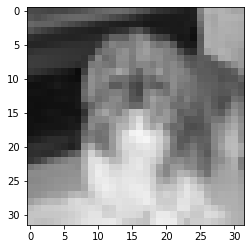

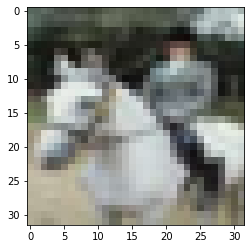

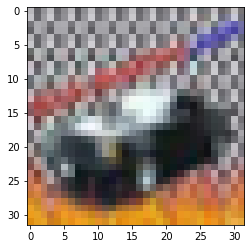

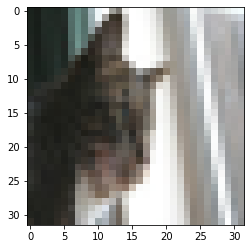

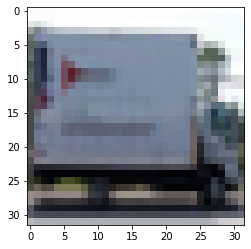

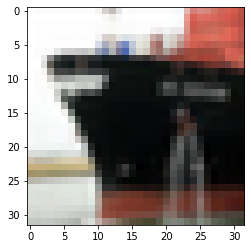

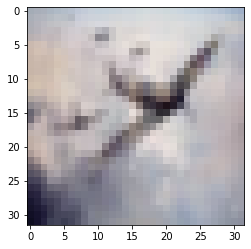

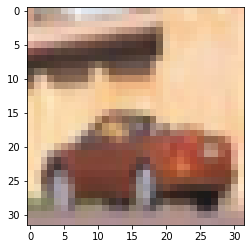

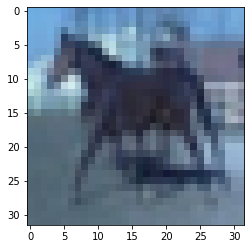

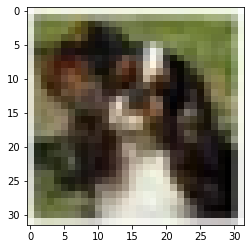

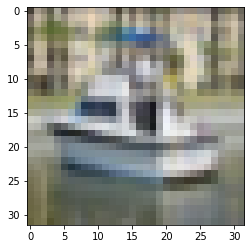

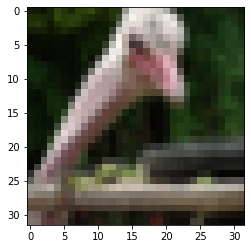

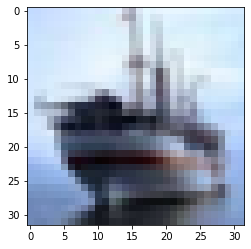

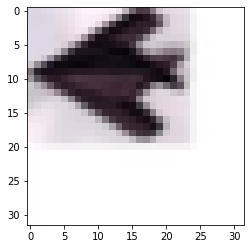

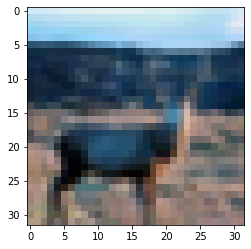

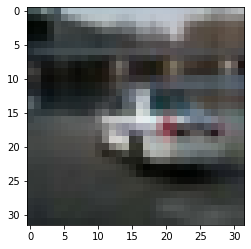

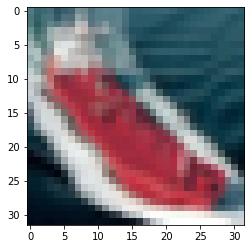

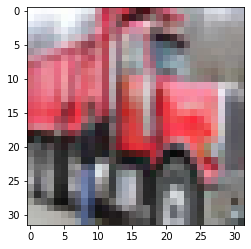

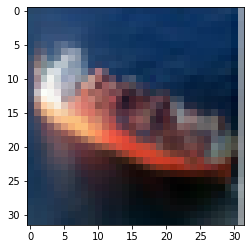

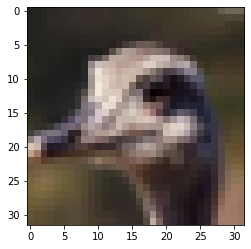

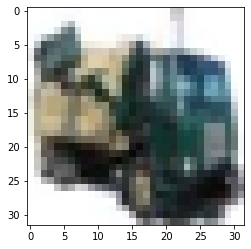

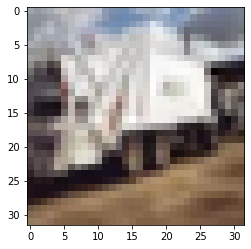

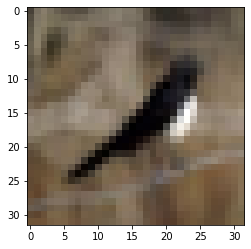

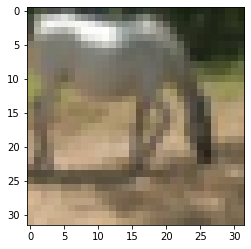

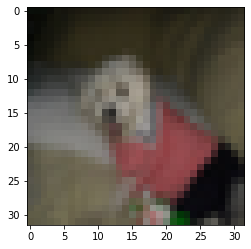

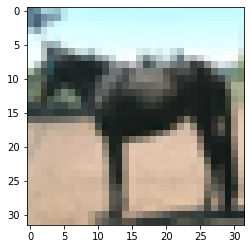

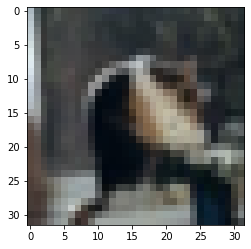

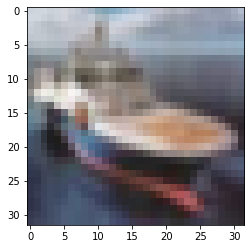

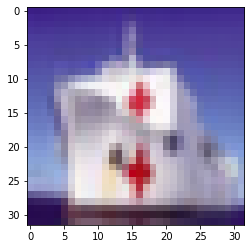

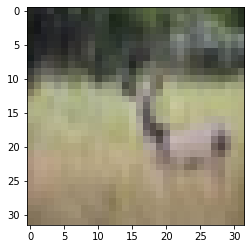

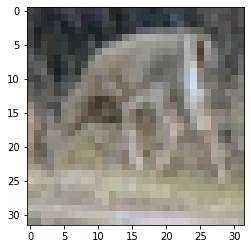

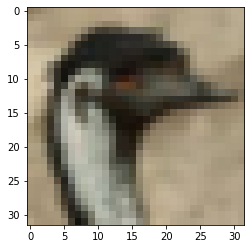

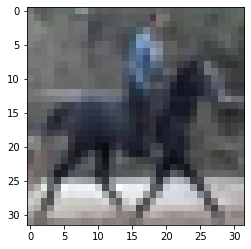

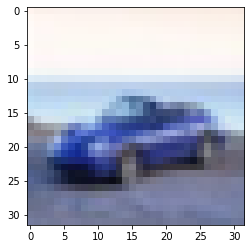

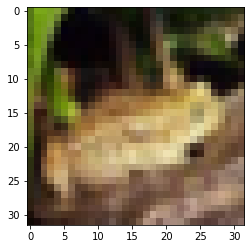

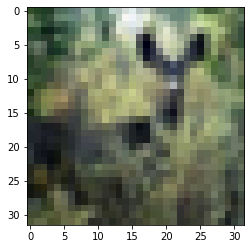

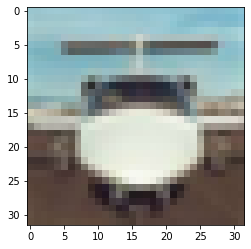

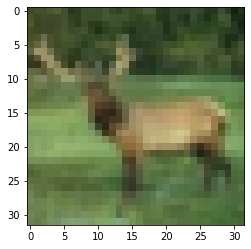

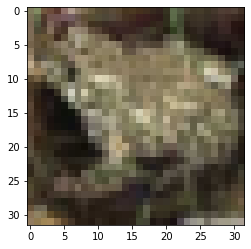

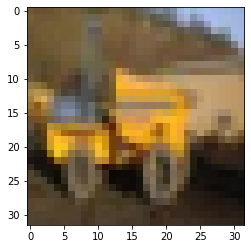

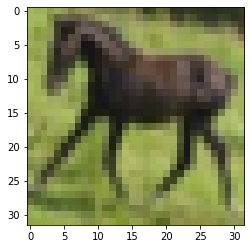

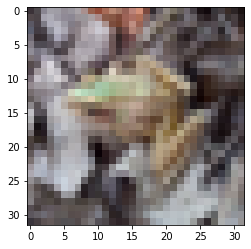

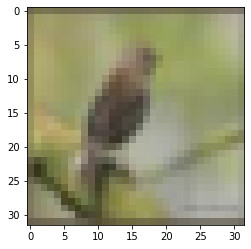

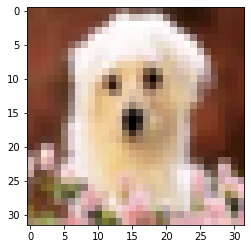

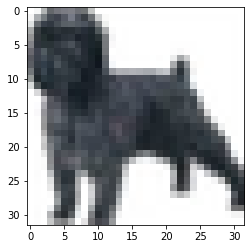

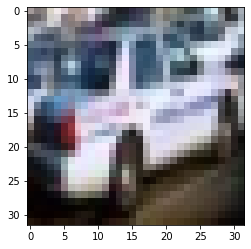

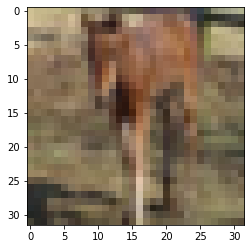

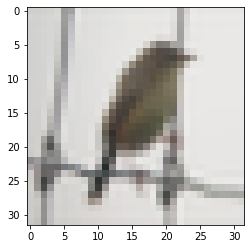

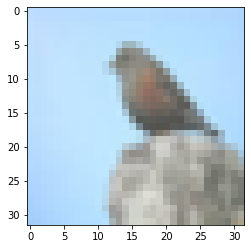

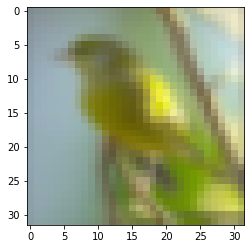

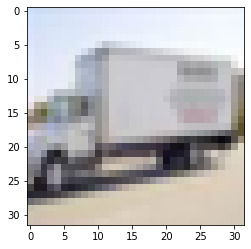

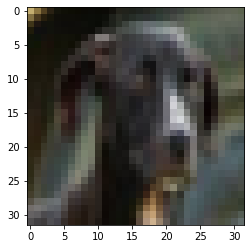

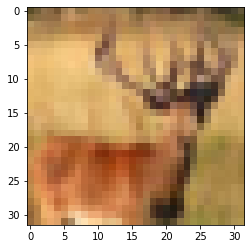

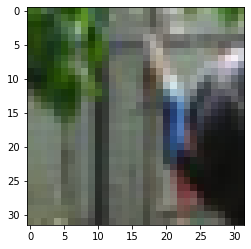

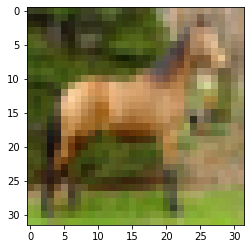

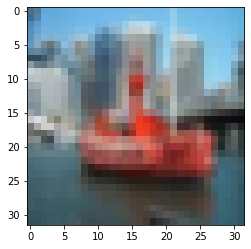

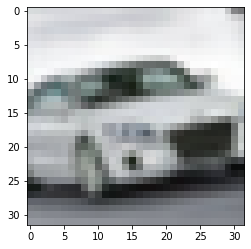

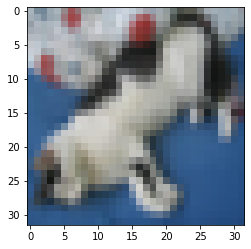

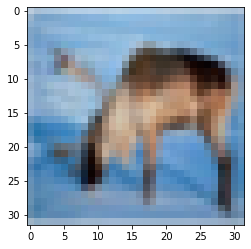

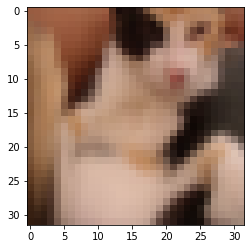

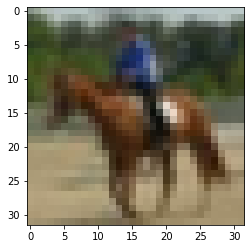

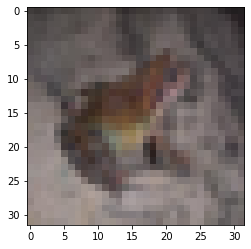

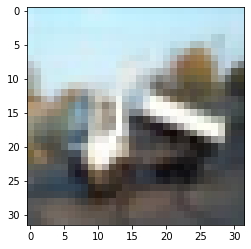

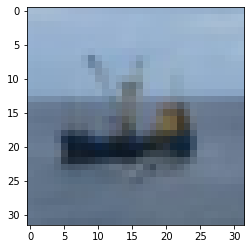

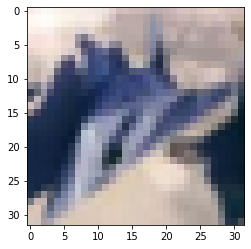

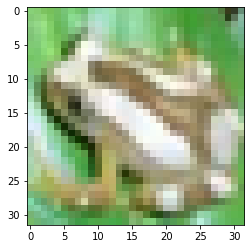

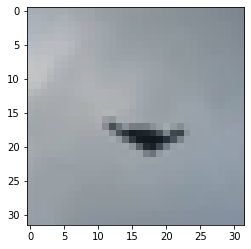

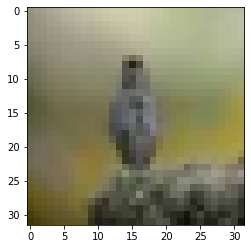

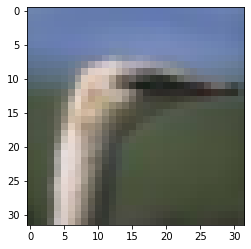

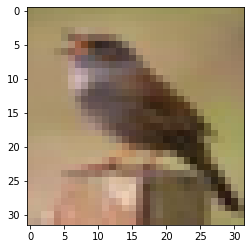

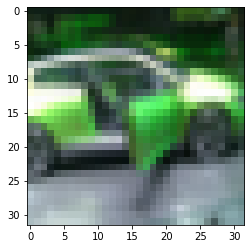

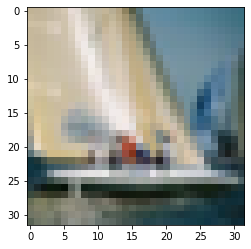

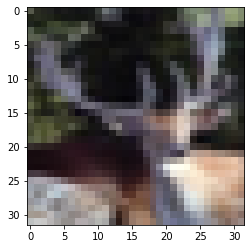

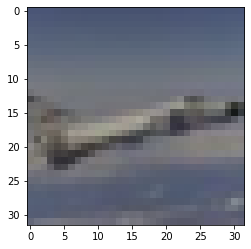

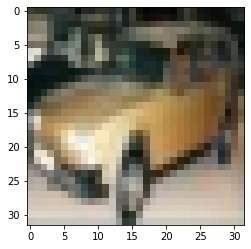

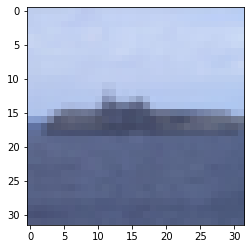

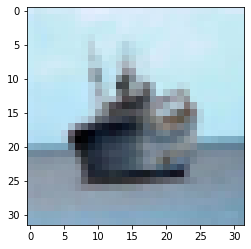

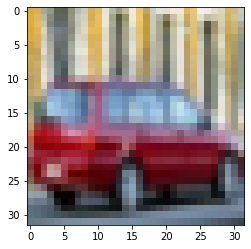

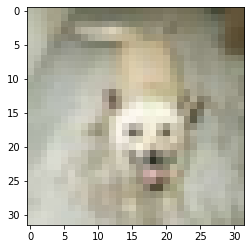

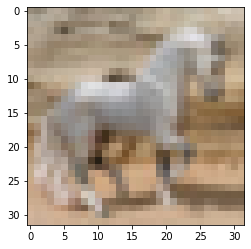

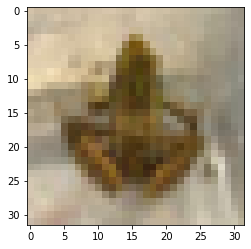

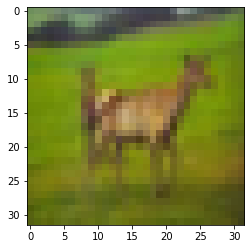

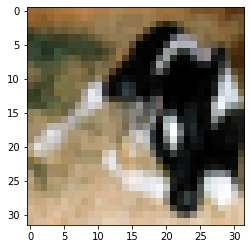

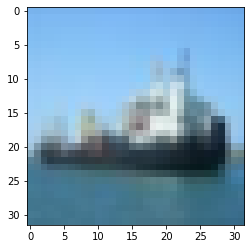

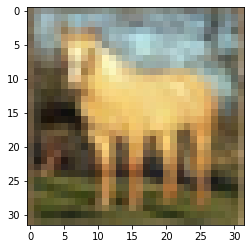

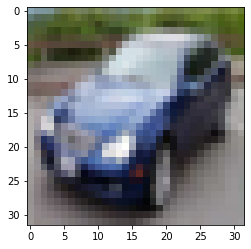

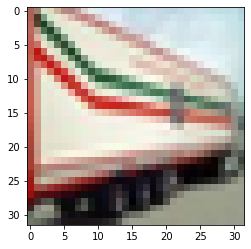

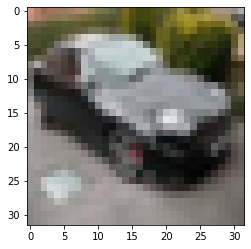

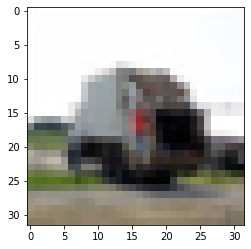

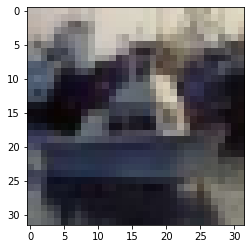

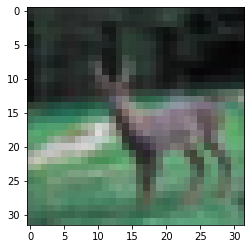

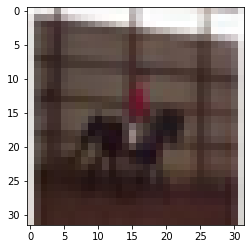

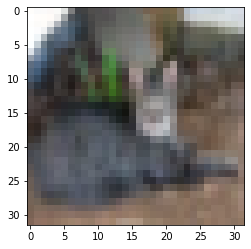

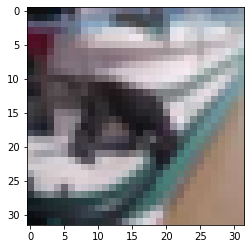

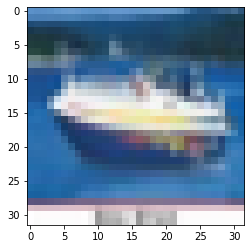

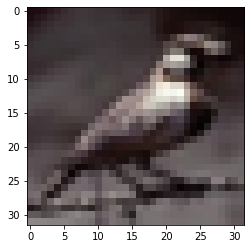

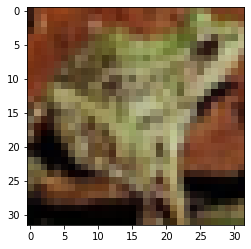

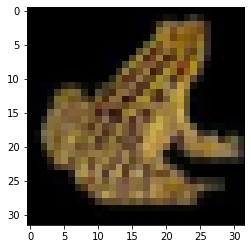

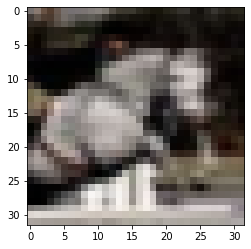

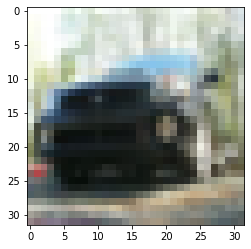

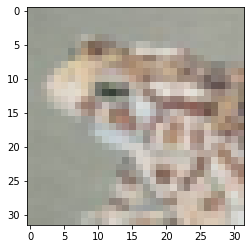

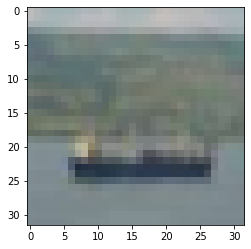

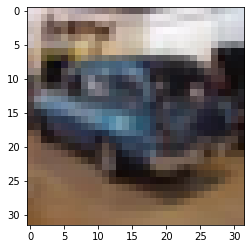

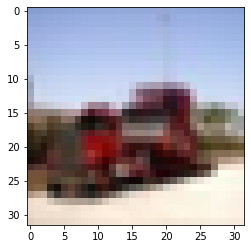

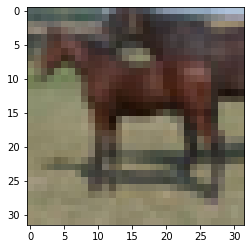

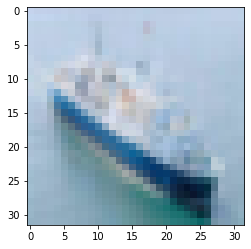

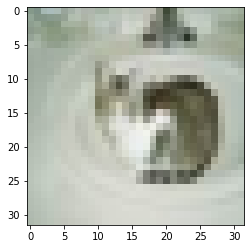

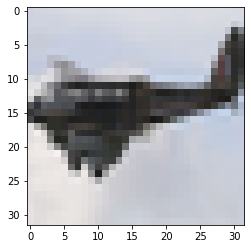

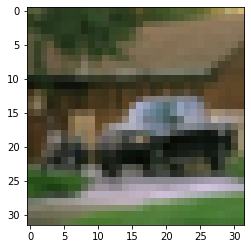

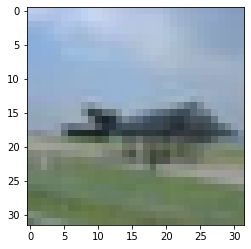

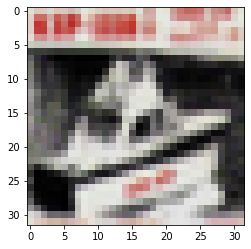

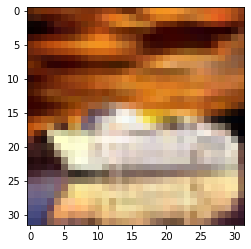

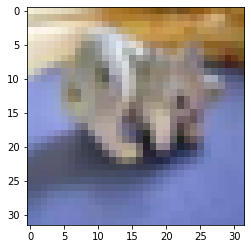

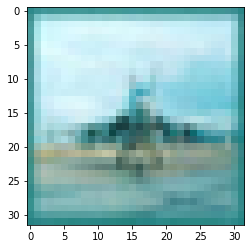

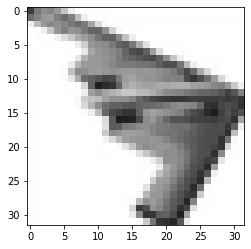

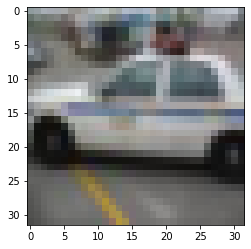

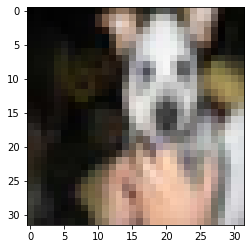

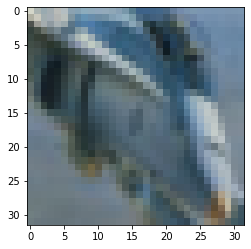

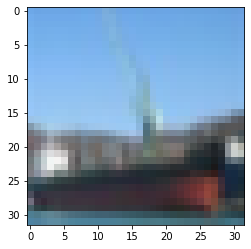

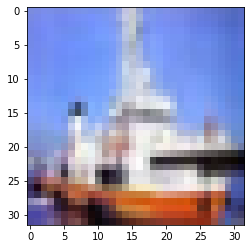

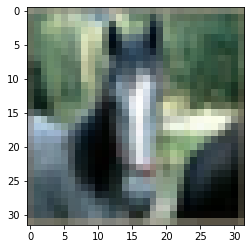

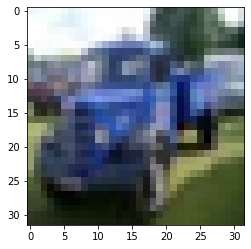

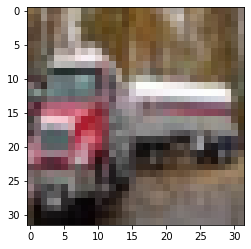

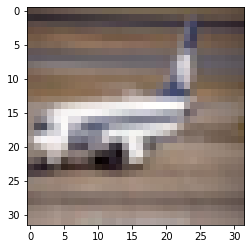

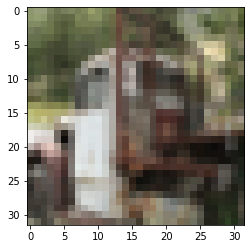

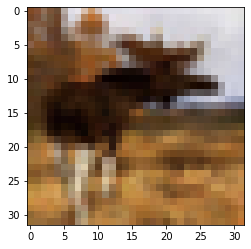

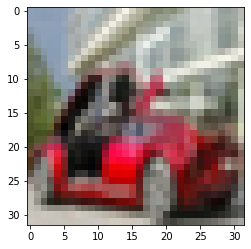

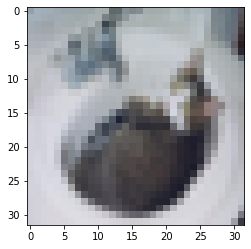

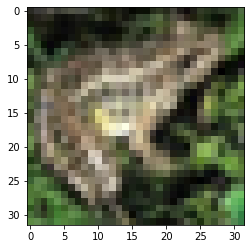

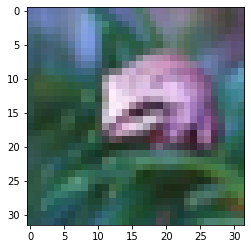

KeyboardInterrupt: ignored

In [8]:
from torchvision.utils import make_grid

n=14
plt.figure(figsize=(20,10))
for i in range(len(train_X)):
  #plt.subplot(330+1+i)
  plt.imshow(train_X[i])
  plt.show()

In [9]:
#@title Convert the pixel values of the dataset to float type and then normalize the dataset

In [10]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [11]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [12]:
#@title Define the model


In [17]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(32,32,3), padding='same',activation='relu', kernel_constraint=maxnorm(3)))

model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))

model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

In [18]:
adam= tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)
 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4194816   
                                                      

In [ ]:
model.fit(train_X,train_Y, validation_data=(test_X,test_Y), epochs=500, batch_size=32)

In [21]:
model.save("model_cifar.h5")

In [22]:
#@title Calculate its accuracy on testing data

In [ ]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

In [24]:
#@title Make Prediction

In [27]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}



In [32]:
from PIL import Image
import numpy as np
im=Image.open("./Classification/dataset-card.jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict([im])[0]
